In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:

data = pd.read_csv('parkinsons.data') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values, columns=['null'])
j=1
sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent', ascending=False)

,null,percent
name,0,0.0
MDVP:Fo(Hz),0,0.0
D2,0,0.0
spread2,0,0.0
spread1,0,0.0
DFA,0,0.0
RPDE,0,0.0
status,0,0.0
HNR,0,0.0
NHR,0,0.0


In [6]:
from sklearn.model_selection import train_test_split
X=data
X=X.drop(['status','name'],axis=1)
y=data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [7]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## **<font color=green>Check for Unbalance Dataset:</font>** ##

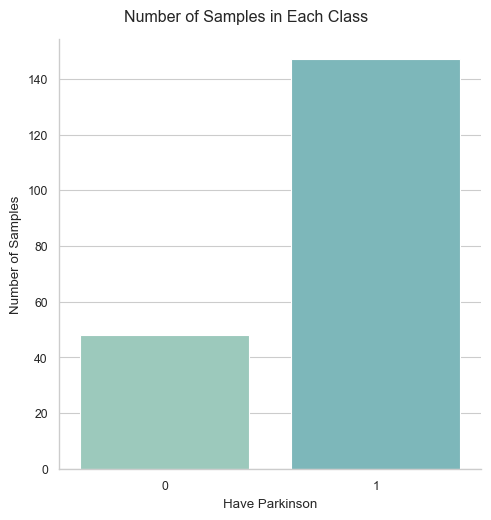

In [10]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='status', data=data, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Parkinson')
plt.show()

In [11]:
from sklearn.dummy import DummyClassifier

# setting up testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [1]
Test score:  0.7755102040816326


In [12]:
# Modeling the data as is
# Train model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
accuracy_score(y_test, lr_pred)


0.8367346938775511

## **<font color=green>Balance Dataset:</font>** ##

### **<font color=deepskyblue>1. Resampling Techniques — Oversample minority class:</font>** ###

In [16]:
from sklearn.utils import resample

X=data
X=X.drop(['status','name'],axis=1)
y=data['status']
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
parkinson = X.loc[X['status'] == 1]
not_parkinson = X.loc[X['status'] == 0]


# upsample minority
fraud_upsampled = resample(not_parkinson,
                          replace=True, # sample with replacement
                          n_samples=len(parkinson), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([parkinson, fraud_upsampled])
y_train_up = upsampled.loc[:,'status']
X_train_up = upsampled.drop(['status'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_up = min_max_scaler.fit_transform(X_train_up)
X_test = min_max_scaler.transform(X_test)
upsampled['status'].value_counts()

1    109
0    109
Name: status, dtype: int64

In [17]:
smote = LogisticRegression(solver='liblinear').fit(X_train_up, y_train_up)

smote_pred = smote.predict(X_test)
print("--------------------------------------------------")
print("||==============================================||")
print("|| Oversample Minority Class Accuracy:=> {:.2f} % ||".format(accuracy_score(y_test, smote_pred)*100))
print("||==============================================||")
print("--------------------------------------------------")

--------------------------------------------------
||==============================================||
|| Oversample Minority Class Accuracy:=> 85.71 % ||
||==============================================||
--------------------------------------------------


In [15]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 4.7 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


### **<font color=deepskyblue>2. Generate synthetic samples:</font>** ###

In [18]:
from imblearn.over_sampling import SMOTE
# 
X=data
X=X.drop(['status','name'],axis=1)
y=data['status']

# setting up testing and trainingsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


min_max_scaler = preprocessing.MinMaxScaler()
              
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

sm = SMOTE(sampling_strategy='mirity', random_state=27)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# oversampled_train = pd.concat([pd.DataFrame(y_train_smote, columns=['class']), pd.Datrame(X_train_smote)], axis=1)
# oversampled_train['class'].value_counts()
# oversampled_train oversampled_train

In [19]:
# smote = LogisticRegression(solver='liblinear').fit(X_train_smote, y_train_smote)
# 
smote_pred = smote.predict(X_test)

print("--------------------------------------------------")
print("||==============================================||")
print("|| Oversample Minority Class Accuracy:=> {:.2f} % ||".format(accuracy_score(y_test, smote_pred)*100))
print("||==============================================||")
print("--------------------------------------------------")

--------------------------------------------------
||==============================================||
|| Oversample Minority Class Accuracy:=> 85.71 % ||
||==============================================||
--------------------------------------------------


## **<font color=deepskyblue>Important Modules:</font>** ##

### **<font color=deepskyblue>Confusion Matrix Plotting Code:</font>** ###

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

### **<font color=deepskyblue>ROC Curve Plotting Code:</font>** ###

In [21]:
def plot_roc_curve(y_test, y_pred):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8, 6))

    # method I: plt
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=11)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.005, 1])
    plt.ylim([0, 1.005])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.grid(color='r', linestyle='--', linewidth=0.2)
    plt.show()

## **<font color=Orange>Choose Final Dataset for our Model:</font>** ##

In [22]:
X_train = X_train_up
y_train = y_train_up

In [23]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

In [24]:
X=data
X=X.drop(['status','name'],axis=1)
y=data['status']

from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object with a variance with a threshold of 0.5
# thresholder = VarianceThreshold(threshold=.5)

# # Conduct variance thresholding
# X_high_variance = thresholder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

X = min_max_scaler.transform(X)

plt.style.use('default')
from sklearn.metrics import accuracy_score

# **<font color=RED>Testing Different Classifiers:</font>** #

## **<font color=green>- Discriminative Classifiers:</font>** ##

### **<font color=green>1) Naive Bayes Classifier:</font>** ###

--------------------------------------------------------
||====================================================||
|| Train Accuracy GaussianNB Model :=> 72.44%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy GaussianNB Model :=> 71.79%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - GaussianNB Model :=> 9.74  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 68.21% +- 6.61%  ||
||====================================================

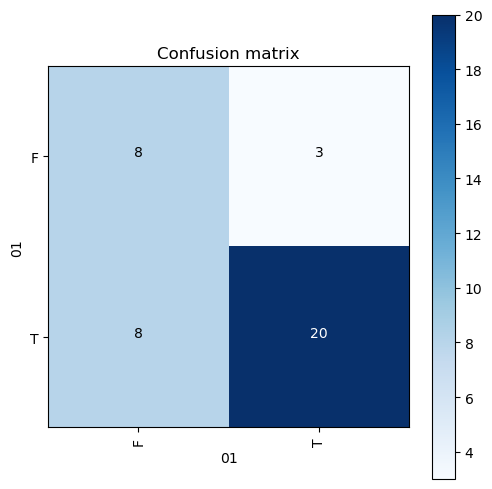

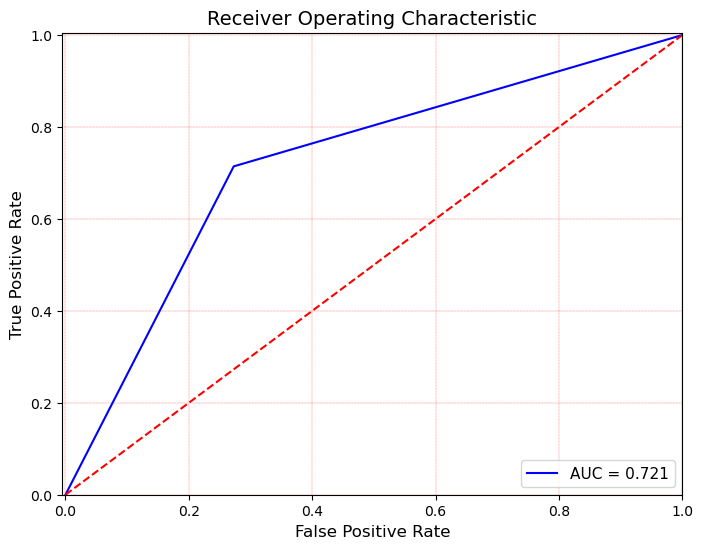

In [25]:
def my_GaussianNB(X_train, y_train, X_test, y_test, X, y):
    clf = GaussianNB()

    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - GaussianNB Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_GaussianNB(X_train, y_train, X_test, y_test, X, y)

### **<font color=green>2) Minimum Distance Classifier:</font>** ###

--------------------------------------------------------
||====================================================||
|| Train Accuracy Minimum Distance Model :=> 77.56%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Minimum Distance Model :=> 74.36%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Minimum Distance Model :=> 8.86  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 74.36% +- 4.29%  ||
||==================================

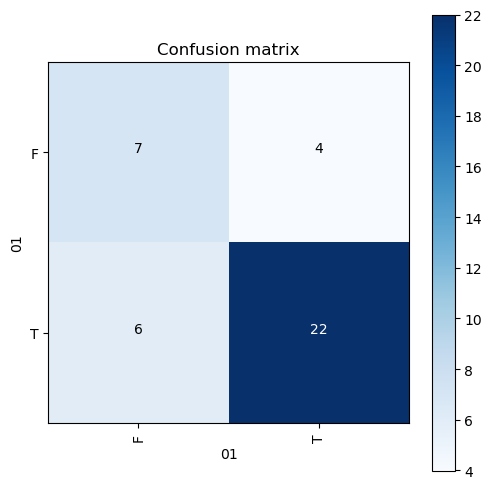

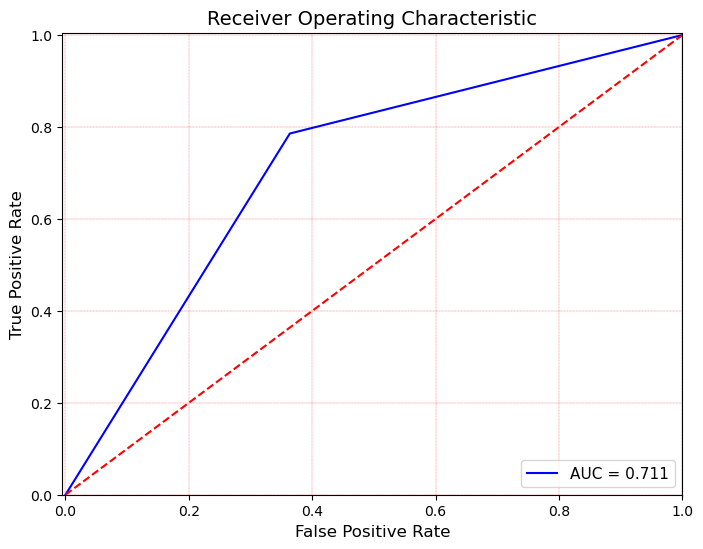

In [26]:
from sklearn.neighbors import NearestCentroid

def my_NearestCentroid(X_train, y_train, X_test, y_test, X, y):
    clf = NearestCentroid(metric='euclidean')
    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy Minimum Distance Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Minimum Distance Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Minimum Distance Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_NearestCentroid(X_train, y_train, X_test, y_test, X, y)


### **<font color=green>3) Logistic Regression:</font>** ###


--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 87.18%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 76.92%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 7.97  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 83.59% +- 7.71%  ||
||============================

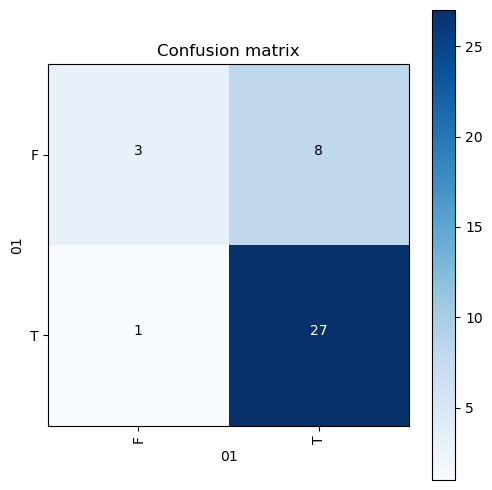

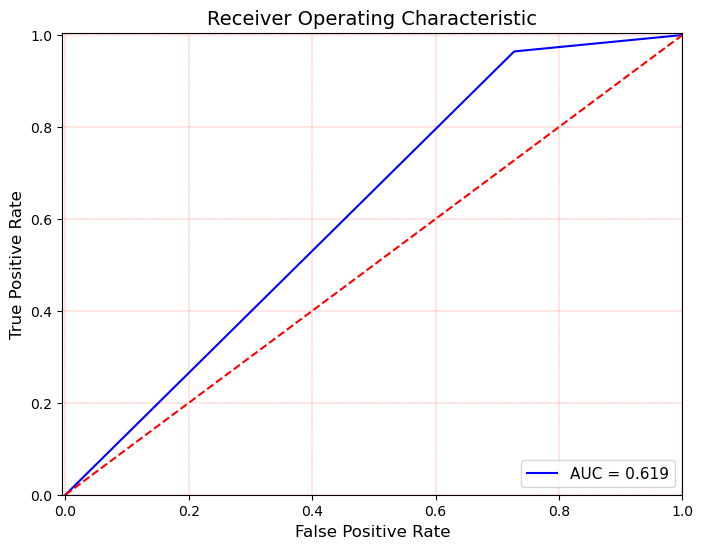

In [27]:
from sklearn.linear_model import LogisticRegression

def my_LogisticRegression(X_train, y_train, X_test, y_test, X, y):
    clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)


my_LogisticRegression(X_train, y_train, X_test, y_test, X, y)


### **<font color=green>4) KNeighbors Classifier:</font>** ###

--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 92.31%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 2.66  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 86.63% +- 5.81%  ||
||====================================================||
-----------------

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

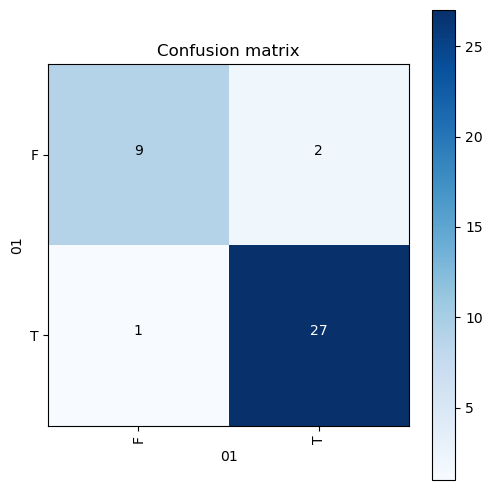

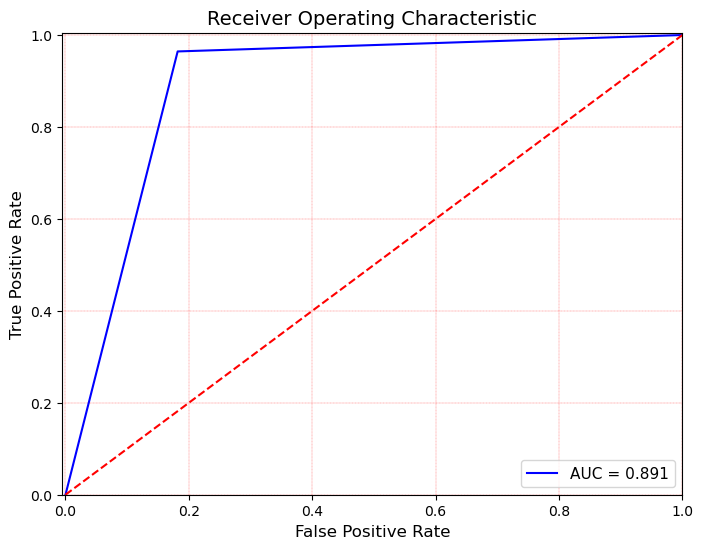

In [28]:
from sklearn.neighbors import KNeighborsClassifier

def my_KNN(X_train, y_train, X_test, y_test, X, y):
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_KNN(X_train, y_train, X_test, y_test, X, y)

### **<font color=green>5) MLP Classifier:</font>** ###

              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.76      1.00      0.86        28

    accuracy                           0.77        39
   macro avg       0.88      0.59      0.58        39
weighted avg       0.83      0.77      0.71        39

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:30000 - Early Stop:True - Hidden Layer Size:300]:=> 80.13 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||===

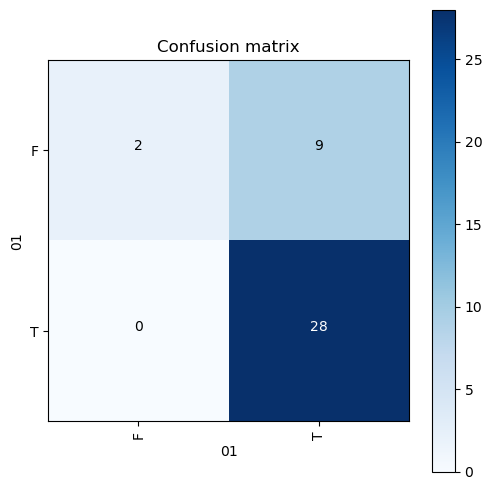

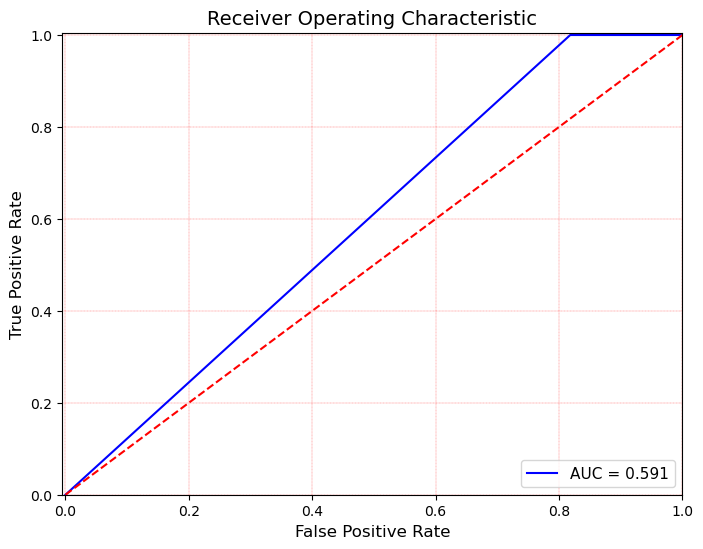

In [29]:
def my_MLP(X_train, y_train, X_test, y_test, X, y):
    hidden_layer_size=300
    max_iteration=30000
    activation_function='relu'
    optimizer='adam'
    early_stopping = True
    ###################################
    mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 30), max_iter=max_iteration, 
                            activation=activation_function, solver=optimizer, 
                            learning_rate='adaptive', early_stopping=early_stopping)
    mlp_adam.fit(X_train, y_train)

    y_pred = mlp_adam.predict(X_test)

    print("======================================================")
    print(classification_report(y_test, y_pred))
    print("======================================================")

    y_pred_train = mlp_adam.predict(X_train)
    print("-------------------------------------------------------------------------------------------------------------")
    print("||=========================================================================================================||")
    print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_train, y_pred_train)*100
                                                                                )
    , "||")
    print("||=========================================================================================================||")
    print("-------------------------------------------------------------------------------------------------------------")

    print("-------------------------------------------------------------------------------------------------------------")
    print("||=========================================================================================================||")
    print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_test, y_pred)*100
                                                                                )
    , "||")
    print("||=========================================================================================================||")
    print("-------------------------------------------------------------------------------------------------------------")

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - MLP Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    # acc = cross_val_score(mlp_adam, X, y, cv=5, scoring='accuracy')
    # print("--------------------------------------------------------")
    # print("||====================================================||")
    # print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    # print("||====================================================||")
    # print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_MLP(X_train, y_train, X_test, y_test, X, y)

### **<font color=green>6) SVM Classifier:</font>** ###

In [30]:
from sklearn import svm

def my_SVM(X_train, y_train, X_test, y_test, X, y):
    X = X_train
    y = y_train

    # class_weight=None
    class_weight='balanced'

    models = (svm.SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight),
            svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight=class_weight),
            svm.SVC(kernel='rbf',class_weight=class_weight, decision_function_shape='ovr'),
            svm.SVC(kernel='poly',class_weight=class_weight, degree=3, decision_function_shape='ovr')
            )
    models_fit = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('SVM with linear Kernel, One-vs-Rest',
            'SVM with linear Kernel, One-VS-One',
            'SVM with RBF Kernel, One-vs-Rest',
            'SVM with Polynomial (degree 3) Kernel, One-vs-Rest')



    scores = []
    for clf, title in zip(models_fit, titles):
        scores.append(clf.score(X_test, y_test))


    print("||============================================================================||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[0]*100), "               ||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with linear Kernel, One-vs-One:=> {:.2f} %'.format(scores[1]*100), "                ||")
    print("|| ---------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[2]*100), "                  ||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[3]*100), "||")
    print("||============================================================================||")
    print("||----------------------------------------------------------------------------||")

    models_fit_mat = (clf.fit(X, y) for clf in models)

    plt.style.use('default')
    for title, clf in zip(titles, models_fit_mat):
        y_pred = clf.predict(X_test)
        confusion_mtx = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(confusion_mtx, "FT", title=title+" Confusion Matrix")

my_SVM(X_train, y_train, X_test, y_test, X, y)

||============================================================================||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> 74.36 %                ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-One:=> 74.36 %                 ||
|| ---------------------------------------------------------------------------||
|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> 74.36 %                   ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> 79.49 % ||
||============================================================================||
||----------------------------------------------------------------------------||


In [32]:
!pip install scikit-learn

### **<font color=green>7) Decision Tree Classifier:</font>** ###

--------------------------------------------------------
||====================================================||
|| Train Accuracy Decision Tree Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 89.74%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 3.54  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 78.46% +- 10.08%  ||
||=========================================

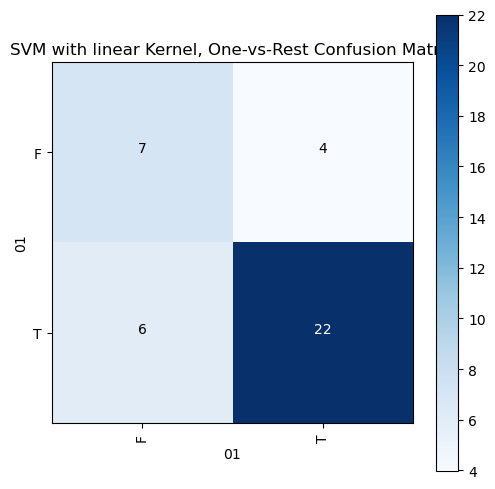

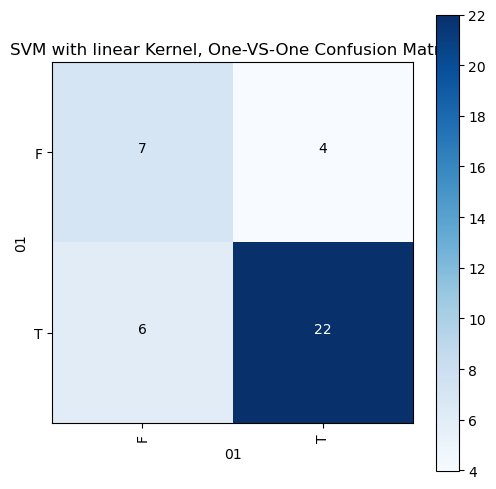

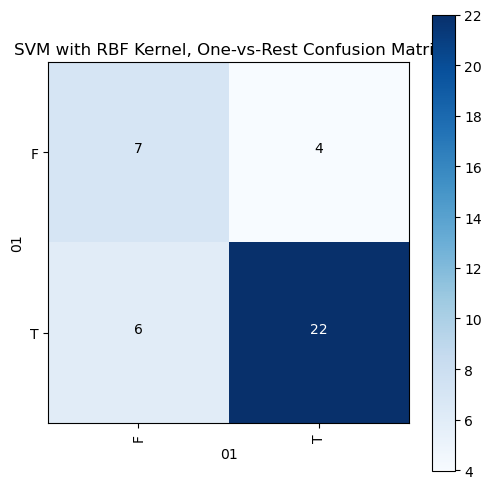

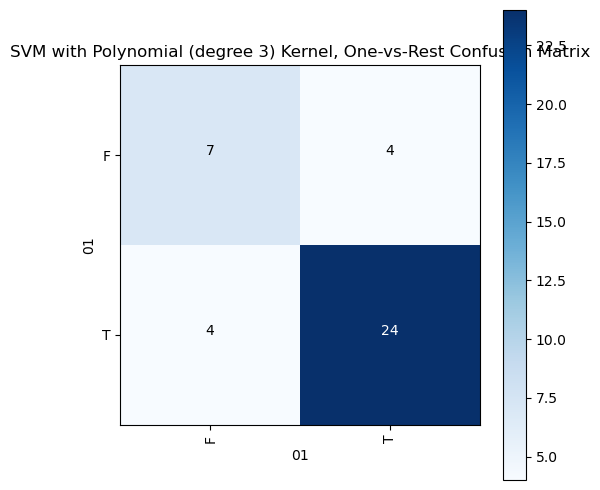

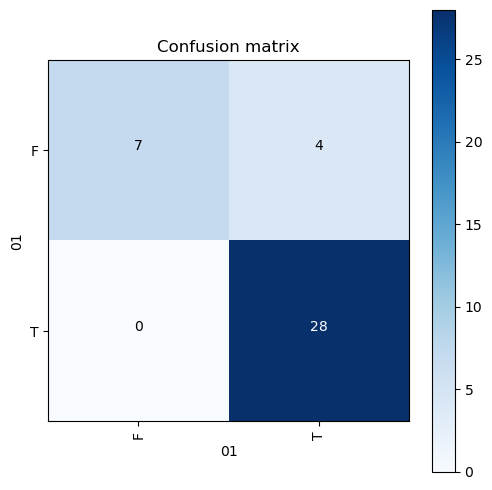

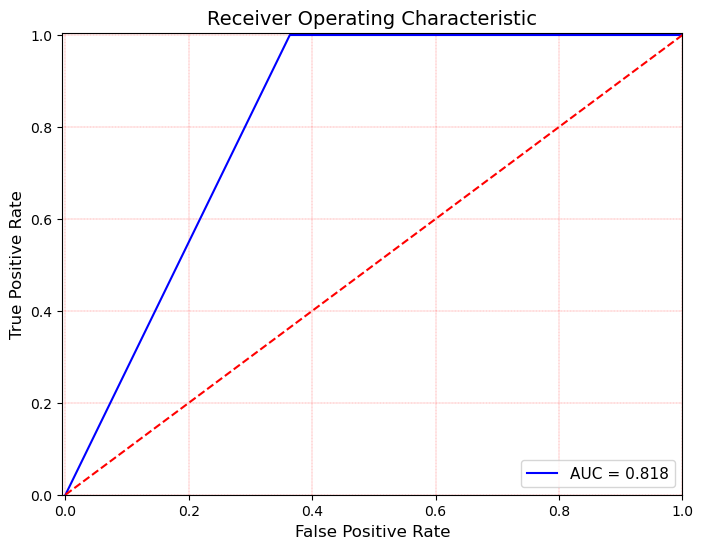

In [31]:
from sklearn import tree

def my_Tree(X_train, y_train, X_test, y_test, X, y):
    clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, 
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                    class_weight='balanced', ccp_alpha=0.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Decision Tree Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_Tree(X_train, y_train, X_test, y_test, X, y)

### **<font color=green>8) RBF Classifier:</font>** ###

In [32]:
def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def kmeans(X, k, max_iters):
  
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    converged = False
    
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]


class RBF:
    def __init__(self, X, y, tX, ty, num_of_classes,
                 k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            x = np.array(x)
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def rbf(self, x, c, s):
        distance = get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)


    def fit(self):
        self.centroids, self.std_list = kmeans(self.X, self.k, max_iters=1000)

        if not self.std_from_clusters:
            dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
            self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

        RBF_X = self.rbf_list(self.X, self.centroids, self.std_list)

        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)

        RBF_list_tst = self.rbf_list(self.tX, self.centroids, self.std_list)

        self.pred_ty = RBF_list_tst @ self.w

        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])

        diff = self.pred_ty - self.ty
        print("--------------------------------------------------------")
        print("||====================================================||")
        print('|| Accuracy of RBF Model:=> {:.2f}'.format(len(np.where(diff == 0)[0]) / len(diff)*100), '% ||')
        print("||====================================================||")
        print("--------------------------------------------------------")


RBF_CLASSIFIER = RBF(X_train, y_train, X_test, y_test, num_of_classes=2,
                     k=30, std_from_clusters=False)

RBF_CLASSIFIER.fit()

K-MEANS:  2
K-MEANS:  0
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
--------------------------------------------------------
||====================================================||
|| Accuracy of RBF Model:=> 76.92 % ||
||====================================================||
--------------------------------------------------------


## **<font color=Deepskyblue>2- Generative Classifier:</font>** ##

###  **<font color=red>1) Parzen Window</font>** ###

In [33]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(kernel='gaussian', bandwidth=1)
model.fit(X_train)
log_dens = model.score_samples(X_test)
log_dens

array([-21.3038461 , -20.59992311, -20.60984929, -20.90162741,
       -21.04539643, -20.69319678, -20.61103521, -20.76651159,
       -23.85298071, -20.96429875, -22.76036952, -20.61639539,
       -20.7448753 , -21.04721575, -20.67774411, -20.85176667,
       -20.67013441, -20.75525966, -21.21757627, -21.07145991,
       -20.65642482, -20.61989006, -20.67317389, -20.60035328,
       -20.66983937, -20.74965897, -20.63615167, -20.59163205,
       -20.73179742, -20.62708012, -20.60408003, -21.02267801,
       -20.6226534 , -21.09064227, -20.98665304, -20.58219455,
       -20.6615622 , -20.66273909, -21.25384437])

--------------------------------------------------------
||====================================================||
|| Test Accuracy Parzen Model :=> 82.05%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Parzen Model :=> 6.20  ||
||====================================================||
--------------------------------------------------------
              precision    recall  f1-score   support

           F       0.74      1.00      0.85        39
           T       1.00      0.64      0.78        39

    accuracy                           0.82        78
   macro avg       0.87      0.82      0.81        78
weighted avg       0.87      0.82      0.81        78



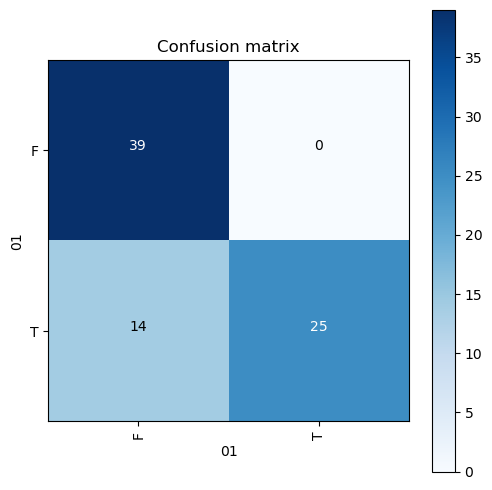

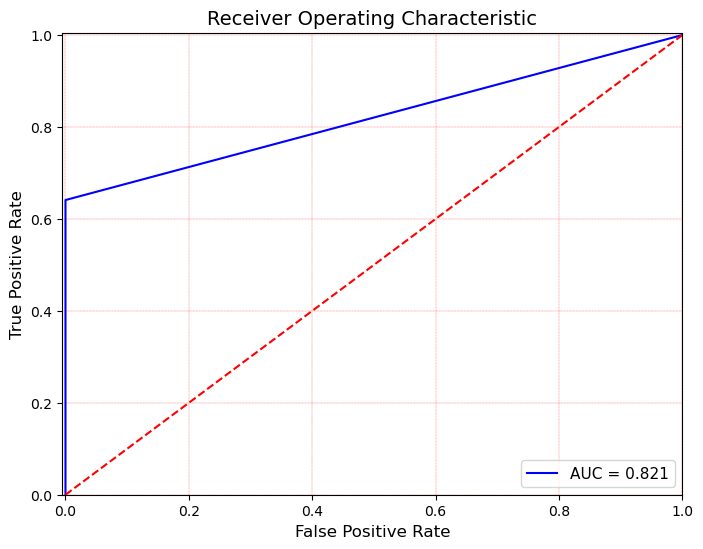

In [34]:
def my_Parzen(X_train, y_train, X_test, y_test, X, y):
    def opt_bayes_parzen(estimators, priors, X_test):
        classes_preds = []
        for estm in range(len(estimators)):
            X_test = np.array(X_test)
            kde = estimators[estm]
            estimation = kde.score_samples(X_test)
            if priors[estm] == 0:
                priors[estm] = 1e-6
            classes_preds.append(estimation + np.log(priors[estm]))
        classes_preds = np.transpose(classes_preds)
        return np.argmax(classes_preds , axis = 1)

    classes = np.unique(y, return_counts=True)[0]
    estimator_list = []
    priors = []
    acc = []
    y_pred = np.array([])
    y_tests = np.array([])
    for cls in range(len(classes)):
        X_train = np.array(X_train)
        one_class = X_train[np.array(y_train).reshape(len(y_train)) == classes[cls]]
        priors.append(0.5) #.append(len(one_class)/len(X))
        kde = KernelDensity(bandwidth=.5, algorithm='auto', kernel='gaussian')
        kde.fit(one_class)
        estimator_list.append(kde)
        # print(priors)
        preds = opt_bayes_parzen(estimators=estimator_list, priors=priors, X_test=X_test)
        labels = np.full(len(preds), cls)
        acc.append(accuracy_score(preds, labels))
        y_pred = np.concatenate((y_pred, preds))
        y_tests = np.concatenate((y_tests, labels))


    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Parzen Model :=> %.2f%%" % (accuracy_score(y_tests, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Parzen Model :=> {:.2f}".format(log_loss(y_tests, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_tests, y_pred)
    print(classification_report(y_tests, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_tests, y_pred)

my_Parzen(X_train, y_train, X_test, y_test, X, y)

###  **<font color=red>2) KNN:</font>** ###

--------------------------------------------------------
||====================================================||
|| Test Accuracy Generative KNN Model :=> 92.31%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Generative KNN Model :=> 2.66  ||
||====================================================||
--------------------------------------------------------
              precision    recall  f1-score   support

           F       0.90      0.82      0.86        11
           T       0.93      0.96      0.95        28

    accuracy                           0.92        39
   macro avg       0.92      0.89      0.90        39
weighted avg       0.92      0.92      0.92        39



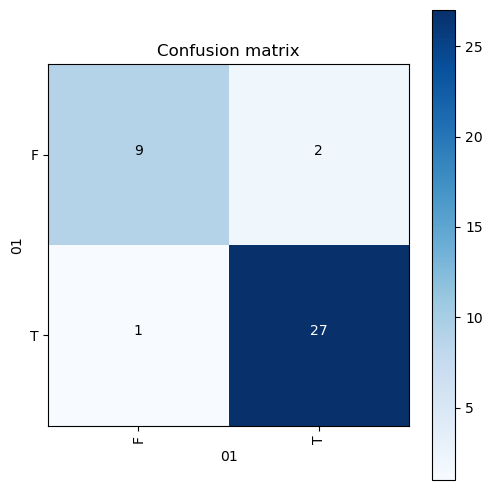

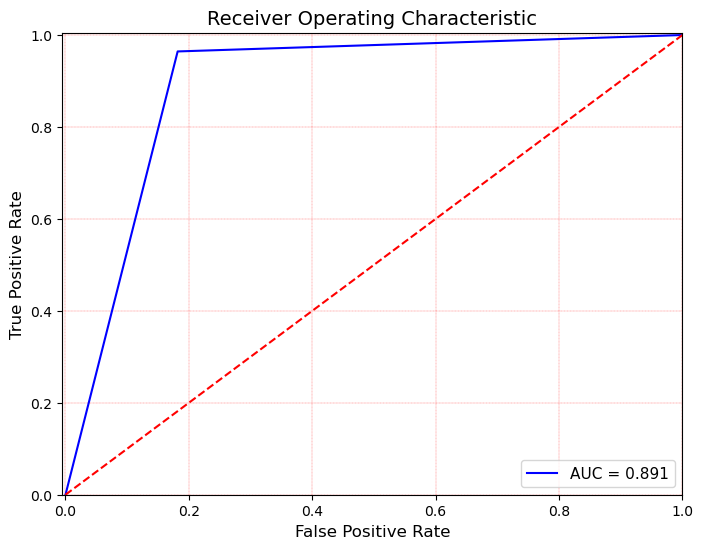

In [35]:
def my_generative_KNN(X_train, y_train, X_test, y_test, X, y):
    def opt_bayes_knn(estimators, priors, X_test):
            classes_preds = []
            proba = estimators.predict_proba(X_test)
            for i in range(len(proba)):
                for j in range(len(proba[i])):
                    if proba[i][j] == 0:
                        proba[i][j] = 1e-6
            for item in range(len(proba[0])):
                if priors[item] == 0:
                    priors[item] = 1e-6
                classes_preds.append(np.log(proba[: , item]) + np.log(priors[item])) 
            classes_preds = np.transpose(classes_preds)
            return np.argmax(classes_preds , axis = 1)

    priors = []
    classes = np.unique(y, return_counts=True)[0]
    one_class1 = X_train[np.array(y_train).reshape(len(y_train)) == classes[0]]
    priors.append(len(one_class1)/len(X_train))
    one_class2 = X_train[np.array(y_train).reshape(len(y_train)) == classes[1]]
    priors.append(len(one_class2)/len(X_train))
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    priors = [0.5, 0.5]
    y_pred = opt_bayes_knn(estimators=knn, priors=priors, X_test=X_test)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Generative KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Generative KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_generative_KNN(X_train, y_train, X_test, y_test, X, y)

###  **<font color=red>3) GMM:</font>** ###

In [36]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train)
          for n in n_components]
plt.style.use('default')
plt.plot(n_components, [m.bic(X_train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
from sklearn.mixture import GaussianMixture

# GMM = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
# GMM.fit(X_train) # Instantiate and fit the model
# print('Converged:', GMM.converged_) # Check if the model has converged
# means = GMM.means_ 
# covariances = GMM.covariances_

# print('\u03BC = ', means, sep="\n")
# print('\u03A3 = ', covariances, sep="\n")

Converged: True
--------------------------------------------------------
||====================================================||
|| Train Accuracy GMM Model :=> 60.26%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy GMM Model :=> 71.79%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - GMM Model :=> 9.74  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 48.21% +- 18.30%  ||
||====================================================||
-

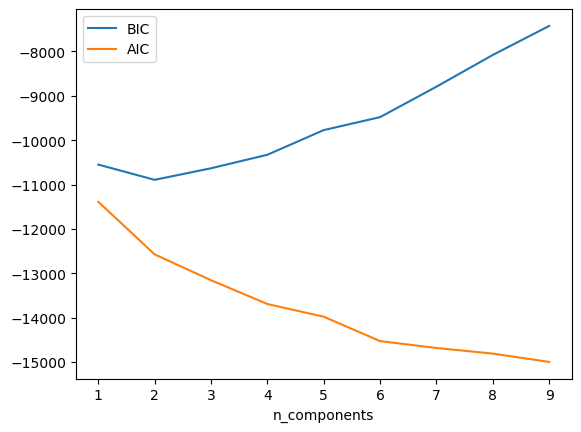

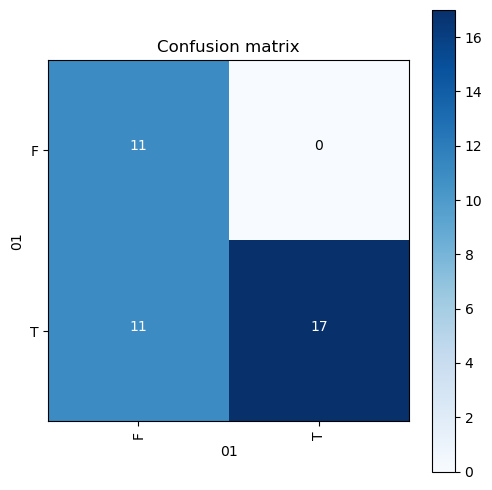

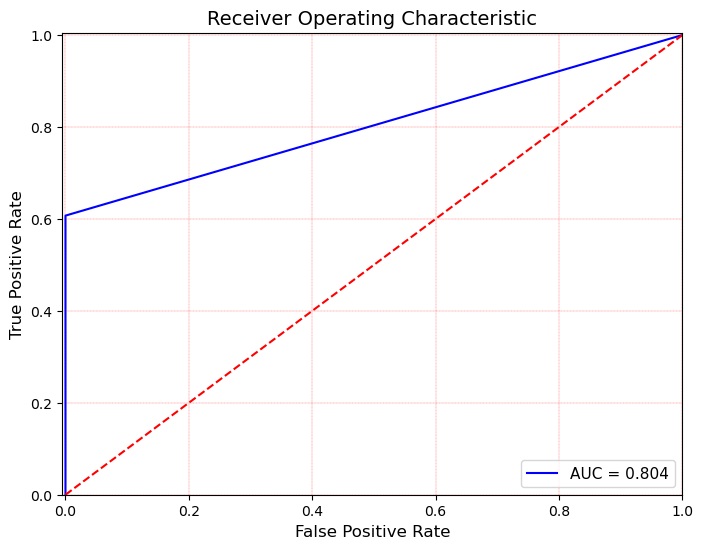

In [38]:
from sklearn.mixture import GaussianMixture

def my_GMM(X_train, y_train, X_test, y_test, X, y):
    GMM = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
    clf=GMM.fit(X_train) # Instantiate and fit the model
    print('Converged:', GMM.converged_)
    y_pred = GMM.predict(X_test)
    y_pred_train = GMM.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy GMM Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy GMM Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - GMM Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf ,X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_GMM(X_train, y_train, X_test, y_test, X, y)

# **<font color=deepskyblue>- Feature Selection:</font>** #


# **<font color=deepskyblue>- Dimension Reduction:</font>** #


## **<font color=deepskyblue>Principle Component Analysis (PCA):</font>** ##


In [40]:
X=data
X=X.drop(['status','name'],axis=1)
y=data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.fit_transform(X)

In [42]:
from sklearn.decomposition import PCA

pca_parkinson = PCA(n_components=5)
principalComponents_parkinson = pca_parkinson.fit_transform(X)

xs = np.array(range(1,31))
plt.figure()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6));
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.plot(xs, pca_parkinson.explained_variance_ratio_);
plt.xlabel('Principal Component', fontsize=13);
plt.ylabel('Covered Variance by this PC', fontsize=13);
plt.title("Explained variation per principal component", fontsize=15);
plt.show();

print("||============================================================================||")
print("||----------------------------------------------------------------------------||")
print('|| Explained variation per PCs for the first two: {} ||'.
      format(pca_parkinson.explained_variance_ratio_[0:2]))
print("||----------------------------------------------------------------------------||")
print("||============================================================================||")

ValueError: x and y must have same first dimension, but have shapes (30,) and (5,)

In [ ]:
pca_total = PCA(n_components=753)
principalComponents_total = pca_total.fit_transform(X)

<Figure size 640x480 with 0 Axes>

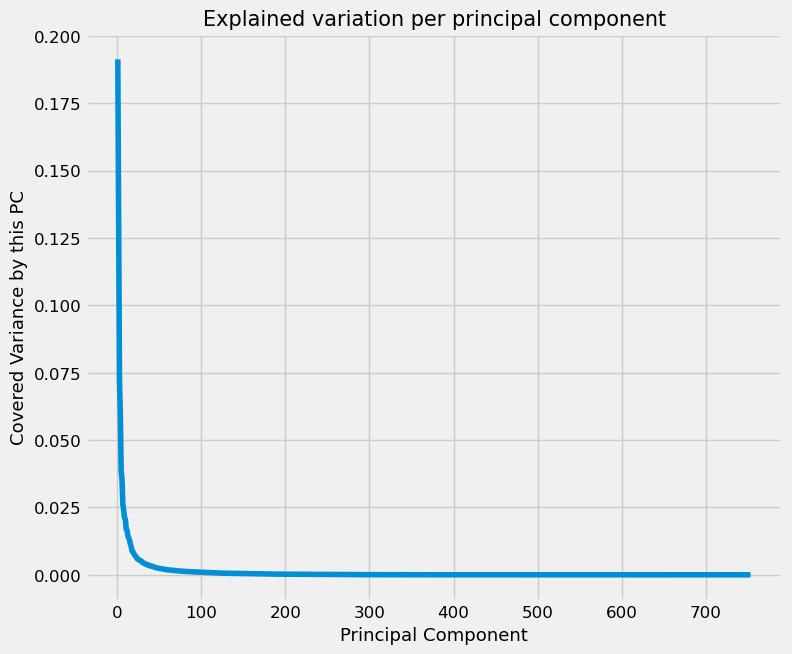

Explained variation per principal component for the first two PCs: [0.19132788 0.12931375]


In [ ]:
n_components = 753
xs = np.array(range(1,n_components+1))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(xs, pca_total.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=13)
plt.ylabel('Covered Variance by this PC',fontsize=13)
plt.title("Explained variation per principal component",fontsize=15)
plt.show()
print('Explained variation per principal component for the first two PCs: {}'.format(pca_total.explained_variance_ratio_[0:2]))

### **<font color=Green>(PCA) - Without Whitening:</font>** ###

In [ ]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=337, whiten=False, svd_solver='auto')

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

X_train = transformer.fit_transform(X_train)

# X_train = transformer.transform()
X_test = transformer.transform(X_test)

### **<font color=Green>(PCA) - Without Whitening- KNN:</font>** ###

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 95.39%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 1.59  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 68.78% +- 2.96%  ||
||====================================================||
-----------------

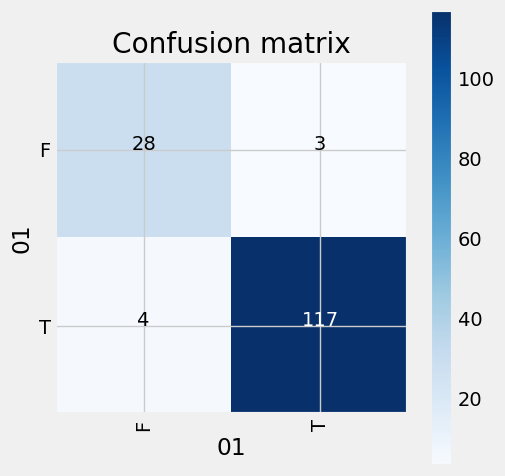

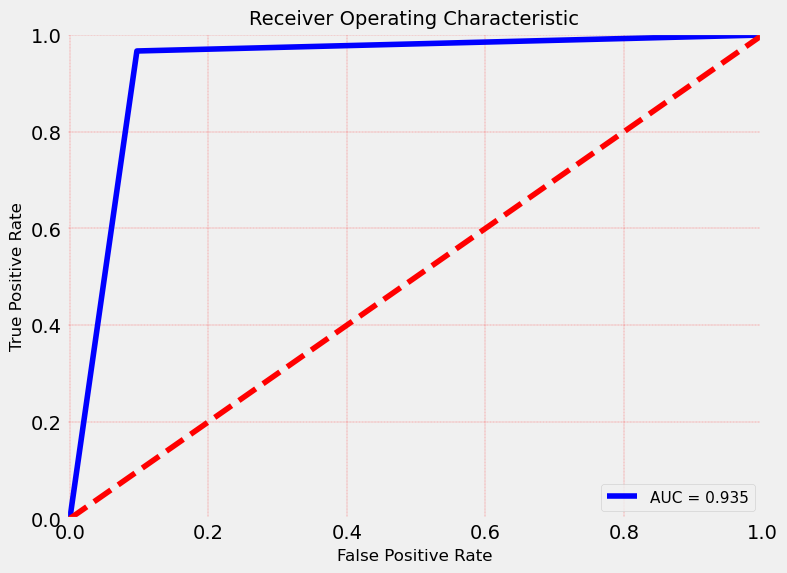

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

### **<font color=Green>(PCA) - Without Whitening- MLP:</font>** ###

              precision    recall  f1-score   support

           0       0.87      0.42      0.57        31
           1       0.87      0.98      0.92       121

    accuracy                           0.87       152
   macro avg       0.87      0.70      0.74       152
weighted avg       0.87      0.87      0.85       152

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:3000 - Early Stop:True - Hidden Layer Size:300]:=> 83.44 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||====

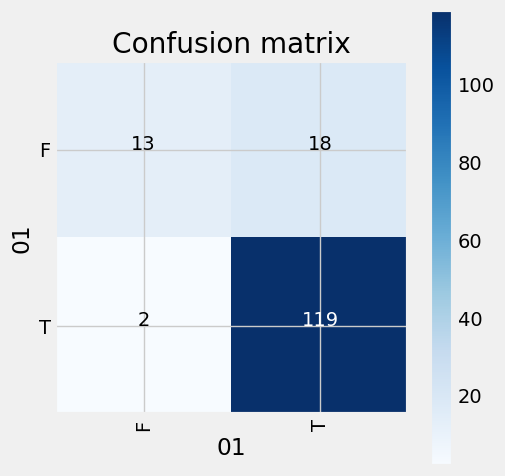

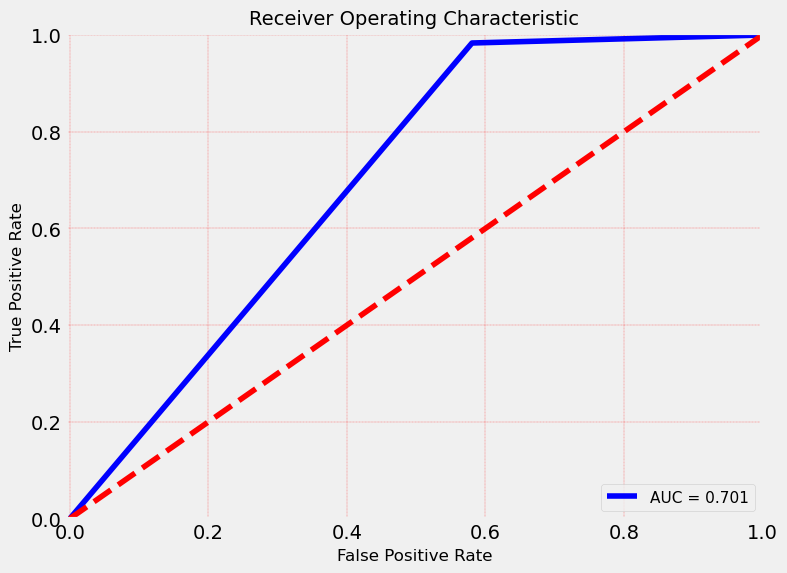

In [ ]:
hidden_layer_size=300
max_iteration=3000
activation_function='relu'
optimizer='adam'
early_stopping = True
###################################
mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 30), max_iter=max_iteration, 
                         activation=activation_function, solver=optimizer, 
                         learning_rate='adaptive', early_stopping=early_stopping)
mlp_adam.fit(X_train, y_train)

y_pred = mlp_adam.predict(X_test)

print("======================================================")
print(classification_report(y_test, y_pred))
print("======================================================")

y_pred_train = mlp_adam.predict(X_train)
print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_train, y_pred_train)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_test, y_pred)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - MLP Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

# acc = cross_val_score(mlp_adam, X, y, cv=5, scoring='accuracy')
# print("--------------------------------------------------------")
# print("||====================================================||")
# print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
# print("||====================================================||")
# print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")



# method I: plt
plot_roc_curve(y_test, y_pred)

### **<font color=Green>(PCA) - Without Whitening- Logistic Regression:</font>** ###

--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 93.21%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 90.13%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 3.41  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 76.98% +- 2.20%  ||
||============================

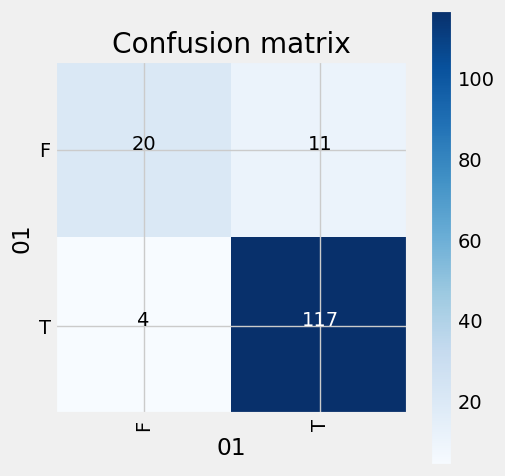

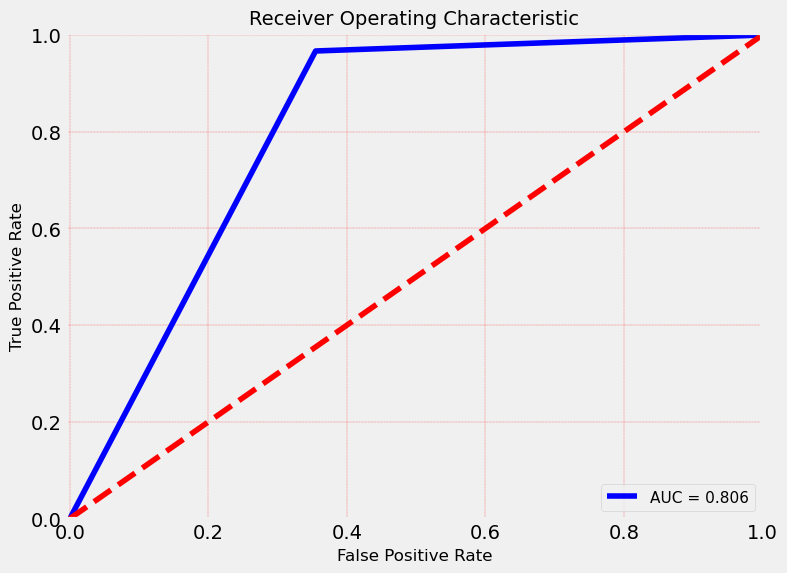

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=27, max_iter=1000).fit(X_train, y_train)
# fitting the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

### **<font color=Green>(PCA) - Without Whitening- SVM:</font>** ###

||============================================================================||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> 83.55 %                ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-One:=> 83.55 %                 ||
|| ---------------------------------------------------------------------------||
|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> 88.82 %                   ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> 88.82 % ||
||============================================================================||
||----------------------------------------------------------------------------||


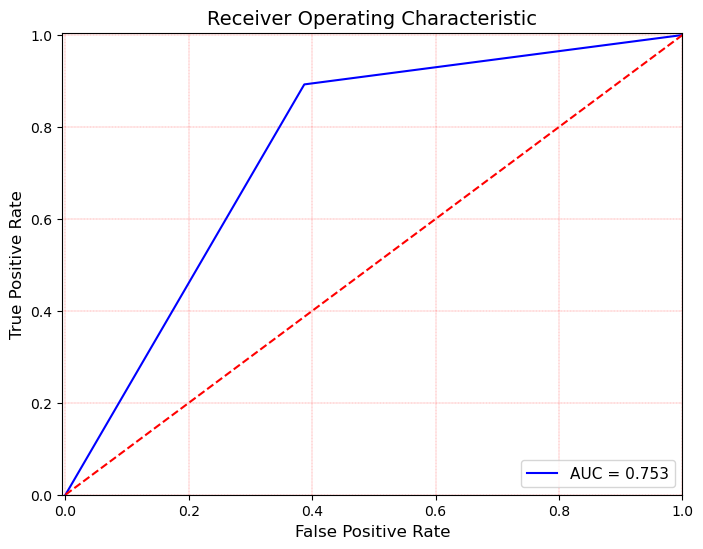

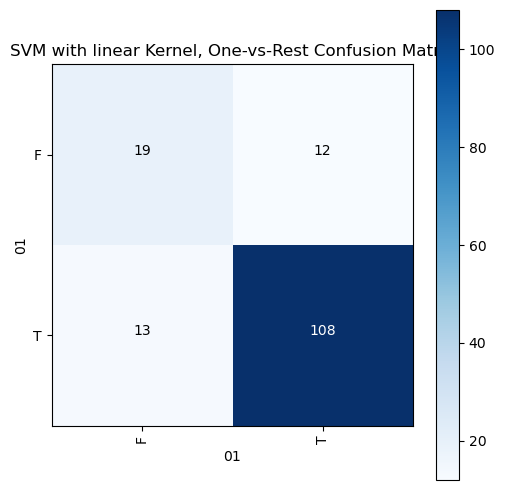

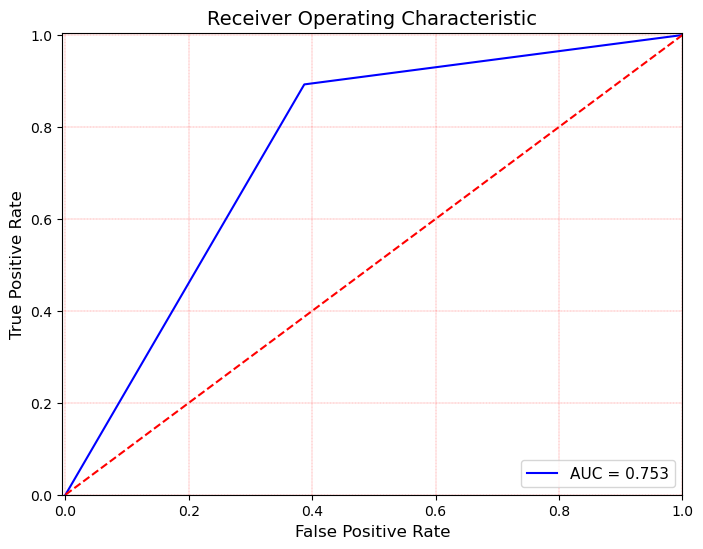

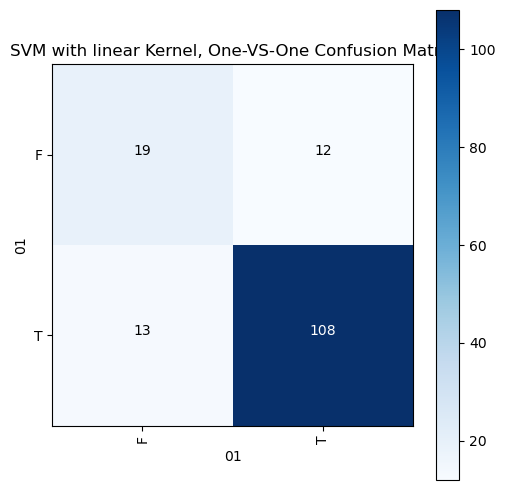

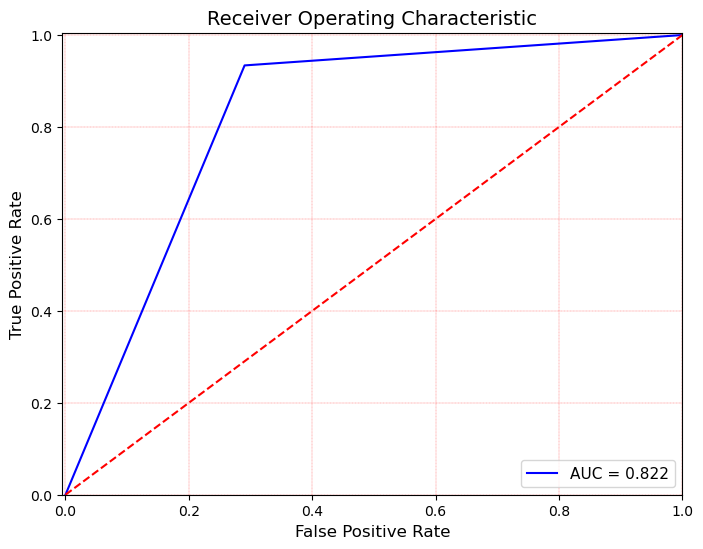

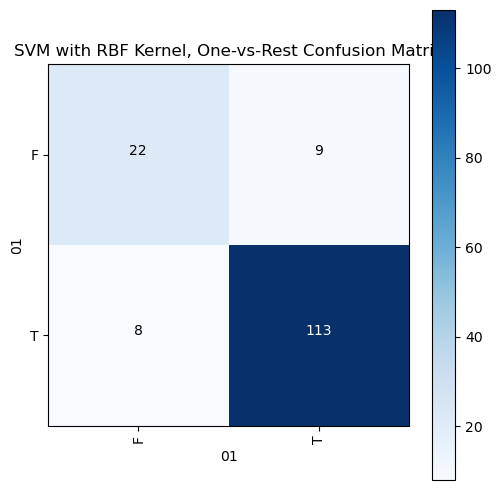

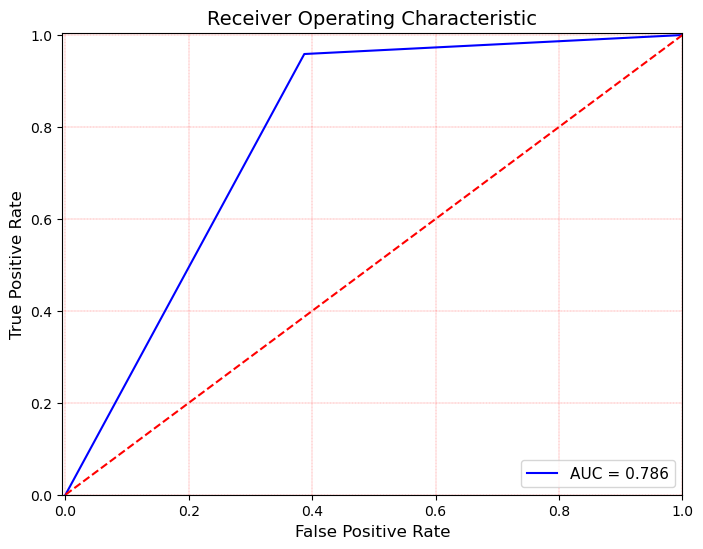

In [ ]:
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = X_train
y = y_train

# class_weight=None
class_weight='balanced'

models = (svm.SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight),
          svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight=class_weight),
          svm.SVC(kernel='rbf',class_weight=class_weight, decision_function_shape='ovr'),
          svm.SVC(kernel='poly',class_weight=class_weight, degree=3, decision_function_shape='ovr')
          )
models_fit = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVM with linear Kernel, One-vs-Rest',
          'SVM with linear Kernel, One-VS-One',
          'SVM with RBF Kernel, One-vs-Rest',
          'SVM with Polynomial (degree 3) Kernel, One-vs-Rest')



scores = []
for clf, title in zip(models_fit, titles):
    scores.append(clf.score(X_test, y_test))


print("||============================================================================||")
print("||----------------------------------------------------------------------------||")
print('|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[0]*100), "               ||")
print("||----------------------------------------------------------------------------||")
print('|| Accuracy of SVM with linear Kernel, One-vs-One:=> {:.2f} %'.format(scores[1]*100), "                ||")
print("|| ---------------------------------------------------------------------------||")
print('|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[2]*100), "                  ||")
print("||----------------------------------------------------------------------------||")
print('|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[3]*100), "||")
print("||============================================================================||")
print("||----------------------------------------------------------------------------||")

models_fit_mat = (clf.fit(X, y) for clf in models)

plt.style.use('default')
for title, clf in zip(titles, models_fit_mat):
    y_pred = clf.predict(X_test)
    plot_roc_curve(y_test, y_pred)
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx, "FT", title=title+" Confusion Matrix")

--------------------------------------------------------
||====================================================||
|| Train Accuracy Decision Tree Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 72.37%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 9.54  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 66.39% +- 3.81%  ||
||==========================================

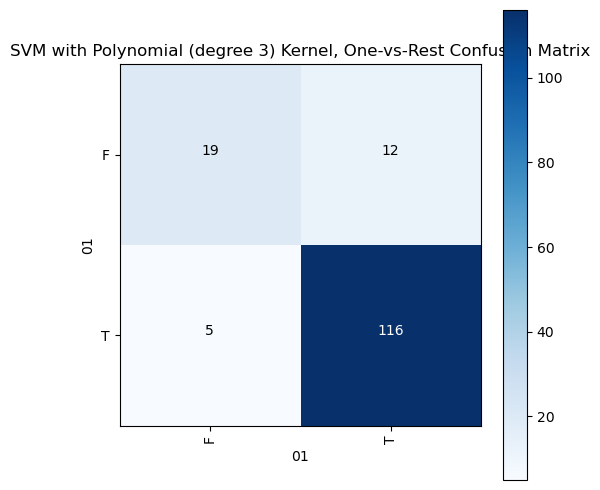

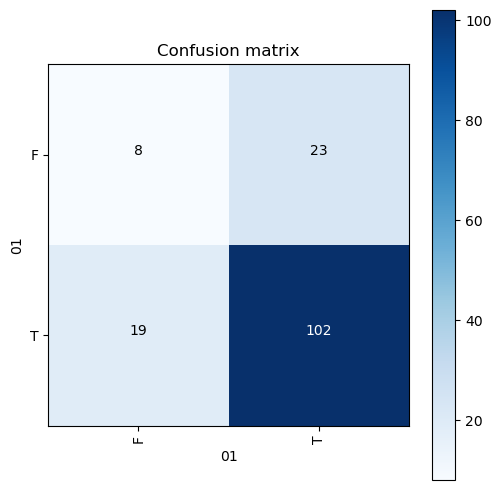

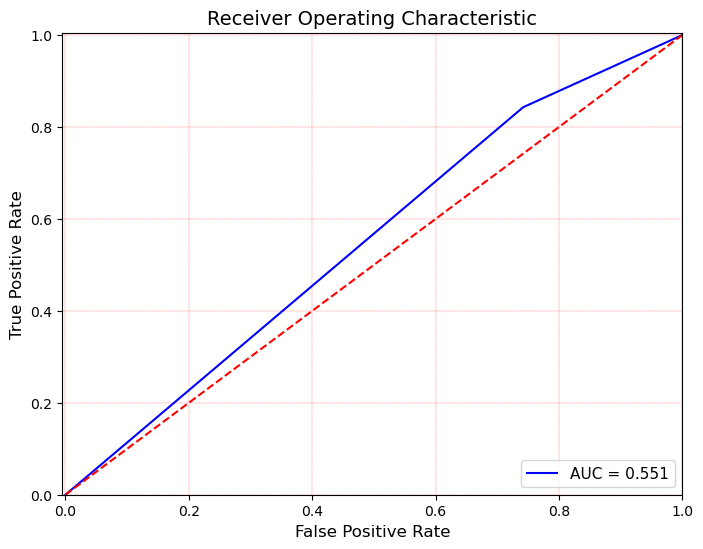

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight='balanced', ccp_alpha=0.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - Decision Tree Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)

### **<font color=Green>(PCA) - With Whitening:</font>** ###

In [ ]:
from sklearn.decomposition import PCA
transformer = PCA(n_components=337, whiten=True, svd_solver='full')

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 90.79%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 3.18  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 68.78% +- 2.96%  ||
||====================================================||
-----------------

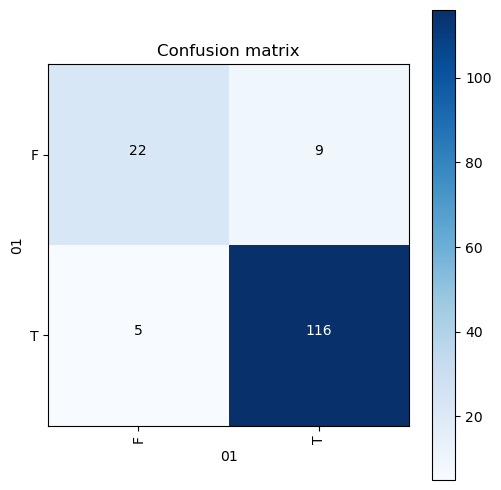

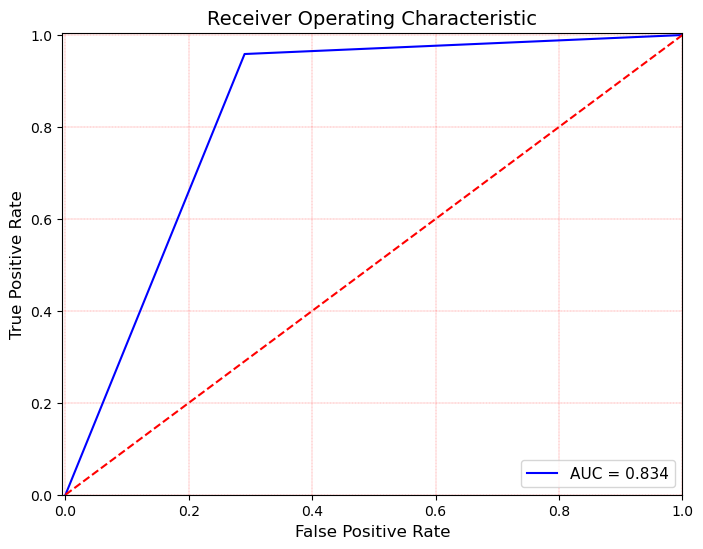

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 79.61%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 7.04  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 76.98% +- 2.20%  ||
||===========================

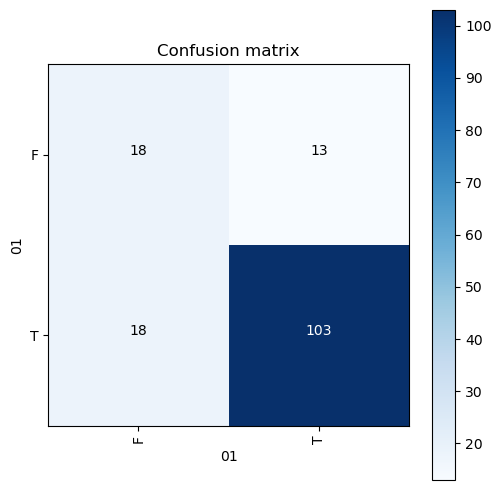

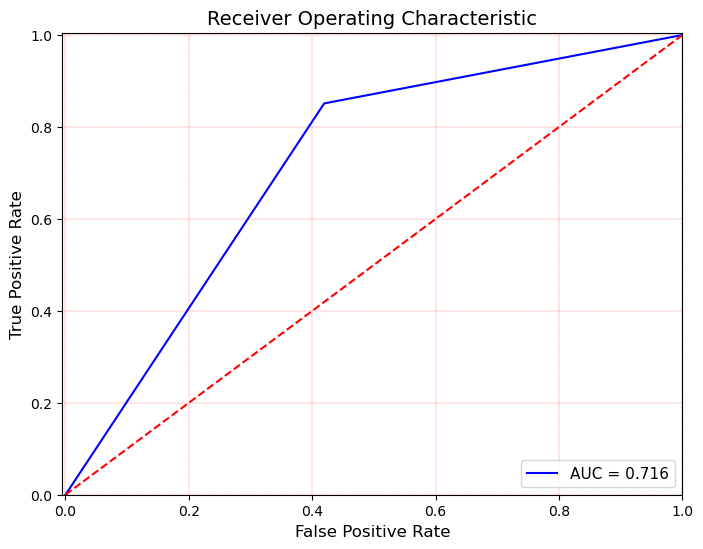

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
# fitting the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.79      0.98      0.88       121

    accuracy                           0.78       152
   macro avg       0.40      0.49      0.44       152
weighted avg       0.63      0.78      0.70       152

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:30000 - Early Stop:True - Hidden Layer Size:300]:=> 96.19 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||===

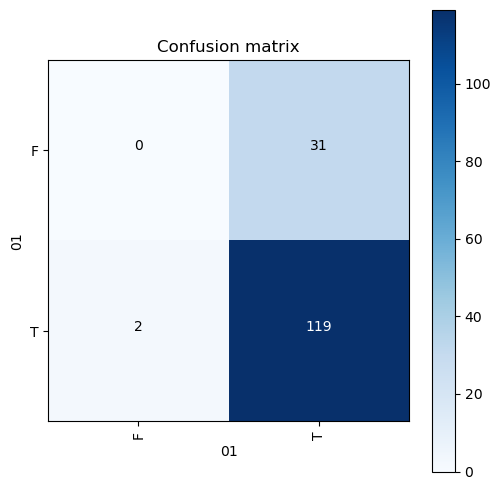

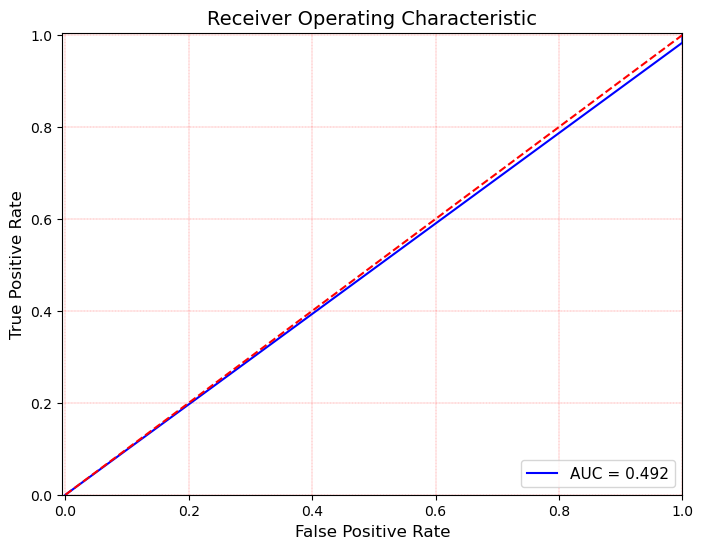

In [ ]:
hidden_layer_size=300
max_iteration=30000
activation_function='relu'
optimizer='adam'
early_stopping = True
###################################
mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 30), max_iter=max_iteration, 
                         activation=activation_function, solver=optimizer, 
                         learning_rate='adaptive', early_stopping=early_stopping)
mlp_adam.fit(X_train, y_train)

y_pred = mlp_adam.predict(X_test)

print("======================================================")
print(classification_report(y_test, y_pred))
print("======================================================")

y_pred_train = mlp_adam.predict(X_train)
print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_train, y_pred_train)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_test, y_pred)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - MLP Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

# acc = cross_val_score(mlp_adam, X, y, cv=5, scoring='accuracy')
# print("--------------------------------------------------------")
# print("||====================================================||")
# print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
# print("||====================================================||")
# print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")



# method I: plt
plot_roc_curve(y_test, y_pred)

In [ ]:
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = X_train
y = y_train

# class_weight=None
class_weight='balanced'

models = (svm.SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight),
          svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight=class_weight),
          svm.SVC(kernel='rbf',class_weight=class_weight, decision_function_shape='ovr'),
          svm.SVC(kernel='poly',class_weight=class_weight, degree=3, decision_function_shape='ovr')
          )
models_fit = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVM with linear Kernel, One-vs-Rest',
          'SVM with linear Kernel, One-VS-One',
          'SVM with RBF Kernel, One-vs-Rest',
          'SVM with Polynomial (degree 3) Kernel, One-vs-Rest')



scores = []
for clf, title in zip(models_fit, titles):
    scores.append(clf.score(X_test, y_test))


print("||============================================================================||")
print("||----------------------------------------------------------------------------||")
print('|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[0]*100), "               ||")
print("||----------------------------------------------------------------------------||")
print('|| Accuracy of SVM with linear Kernel, One-vs-One:=> {:.2f} %'.format(scores[1]*100), "                ||")
print("|| ---------------------------------------------------------------------------||")
print('|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[2]*100), "                  ||")
print("||----------------------------------------------------------------------------||")
print('|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[3]*100), "||")
print("||============================================================================||")
print("||----------------------------------------------------------------------------||")

models_fit_mat = (clf.fit(X, y) for clf in models)

plt.style.use('default')
for title, clf in zip(titles, models_fit_mat):
    y_pred = clf.predict(X_test)
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx, "FT", title=title+" Confusion Matrix")

||============================================================================||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> 76.97 %                ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-One:=> 76.97 %                 ||
|| ---------------------------------------------------------------------------||
|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> 83.55 %                   ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> 86.18 % ||
||============================================================================||
||----------------------------------------------------------------------------||


## **<font color=deepskyblue>Linear Discriminant Analysis (LDA):</font>** ##


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)

X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

--------------------------------------------------------
||====================================================||
|| Train Accuracy Decision Tree Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 61.84%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 13.18  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 75.40% +- 5.71%  ||
||=========================================

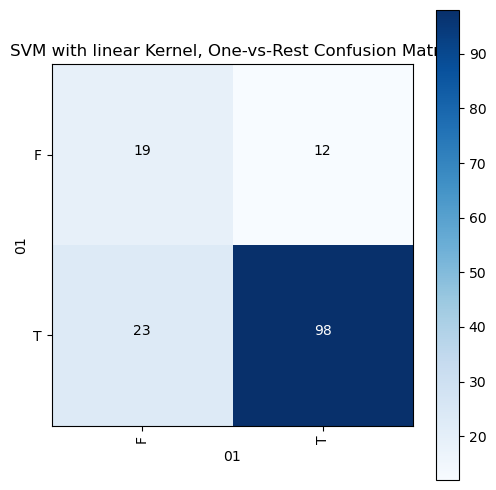

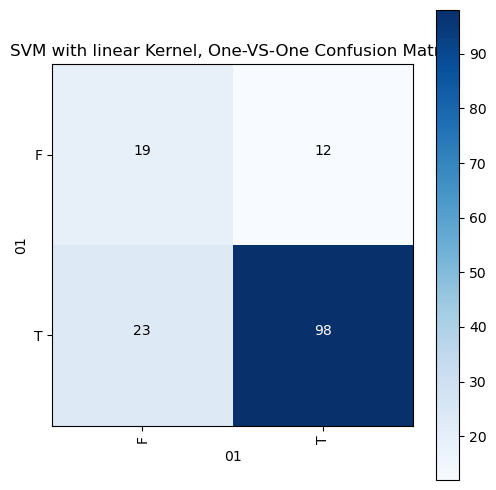

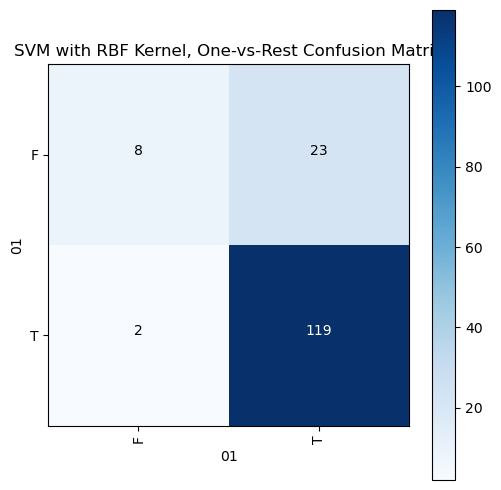

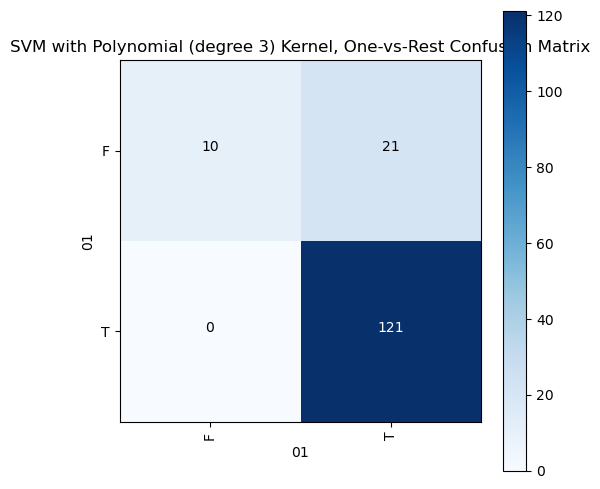

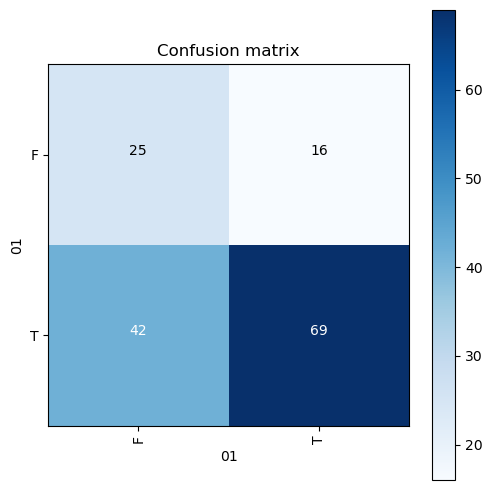

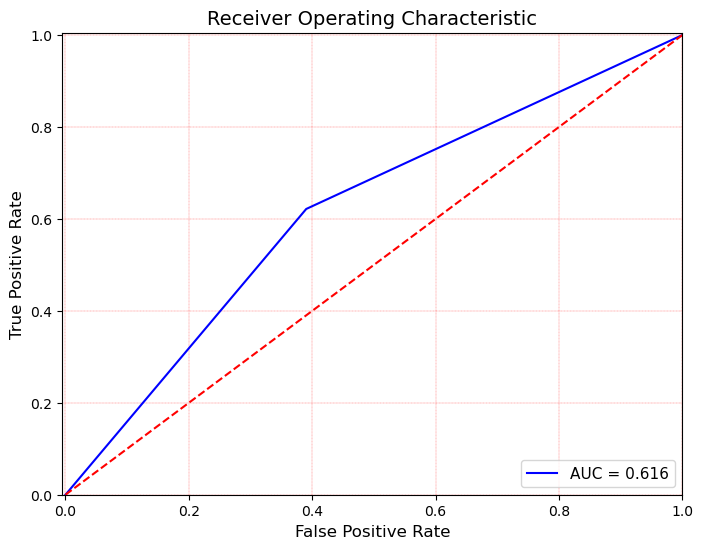

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight='balanced', ccp_alpha=0.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - Decision Tree Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)

--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 61.84%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 13.18  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 83.07% +- 4.25%  ||
||==========================

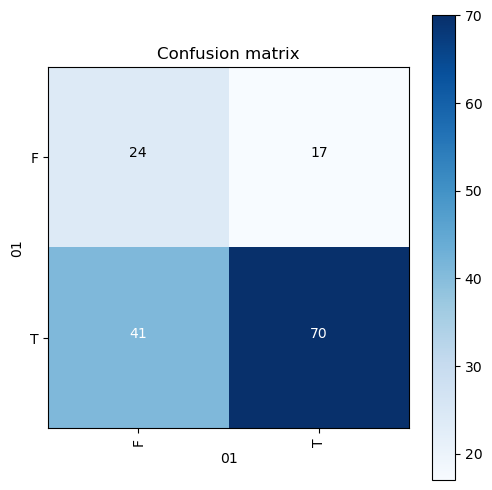

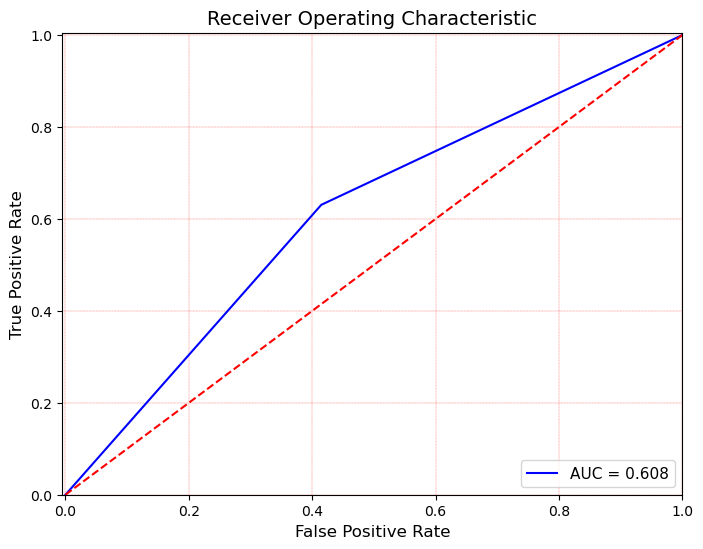

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
# fitting the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

### **<font color=deepskyblue>KNN - LDA:</font>** ###


c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 61.84%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 13.18  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 79.23% +- 1.11%  ||
||====================================================||
----------------

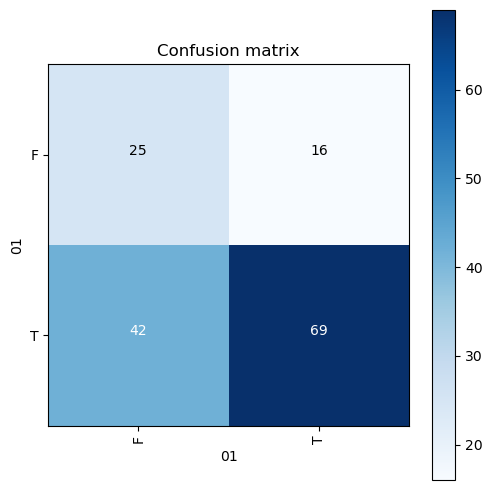

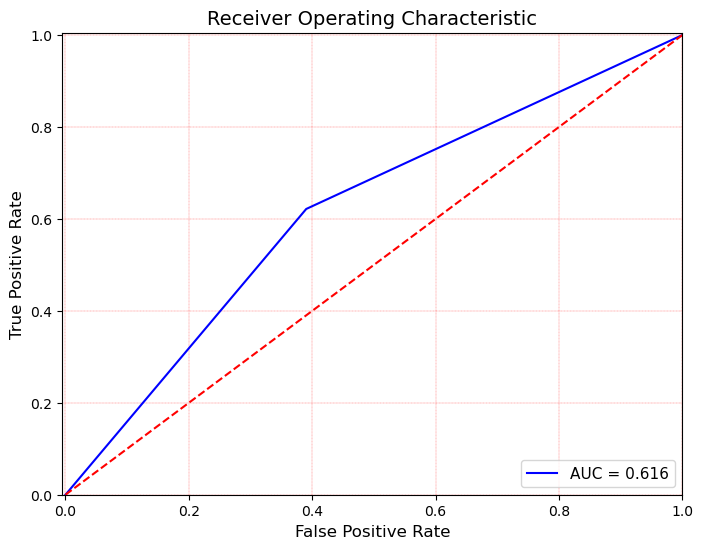

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

### **<font color=deepskyblue>MLP - LDA:</font>** ###


              precision    recall  f1-score   support

           0       0.36      0.73      0.48        41
           1       0.84      0.52      0.64       111

    accuracy                           0.58       152
   macro avg       0.60      0.63      0.56       152
weighted avg       0.71      0.58      0.60       152

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:3000 - Early Stop:False - Hidden Layer Size:300]:=> 100.00 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||==

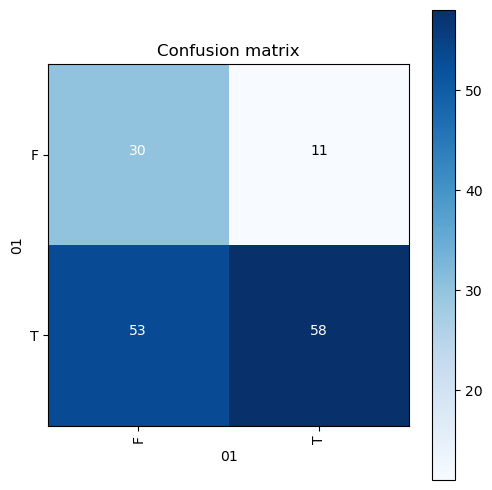

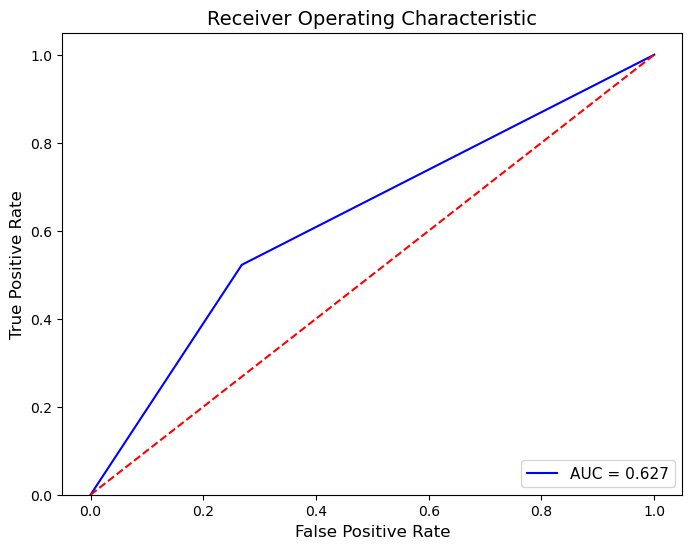

In [ ]:
hidden_layer_size=300
max_iteration=3000
activation_function='relu'
optimizer='adam'
early_stopping = False
###################################
mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 73), max_iter=max_iteration, 
                         activation=activation_function, solver=optimizer, 
                         learning_rate='adaptive', early_stopping=early_stopping)
mlp_adam.fit(X_train, y_train)

y_pred = mlp_adam.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), "FT")
print("======================================================")
print(classification_report(y_test, y_pred))
print("======================================================")

y_pred_train = mlp_adam.predict(X_train)
print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_train, y_pred_train)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_test, y_pred)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 6))

# method I: plt
plt.title('Receiver Operating Characteristic', fontsize=14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=11)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

## **<font color=deepskyblue>- Independent Component Analysis (ICA):</font>** ##


In [ ]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=50, random_state=8, max_iter=2000)

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.fit_transform(X)

transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

### **<font color=lightgreen>- KNN (ICA):</font>** ###


c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 93.42%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 2.27  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 79.49% +- 3.71%  ||
||====================================================||
-----------------

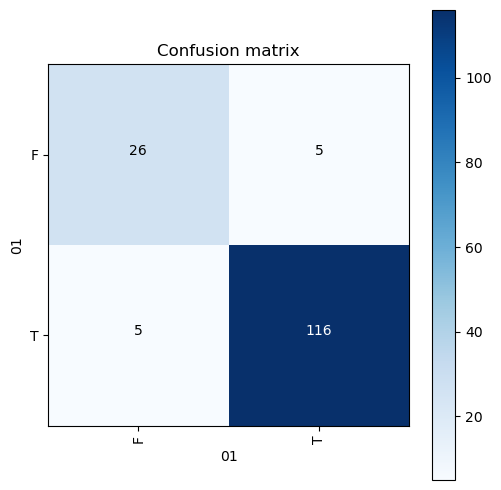

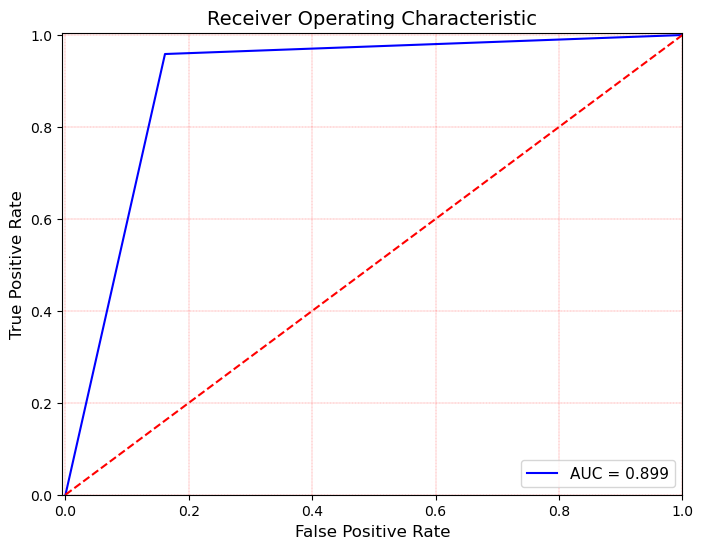

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

my_KNN(X_train, y_train, X_test, y_test, X, y)

### **<font color=lightgreen>- Logistic Regression (ICA):</font>** ###


--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 73.34%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 79.61%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 7.04  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 82.94% +- 4.06%  ||
||============================

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


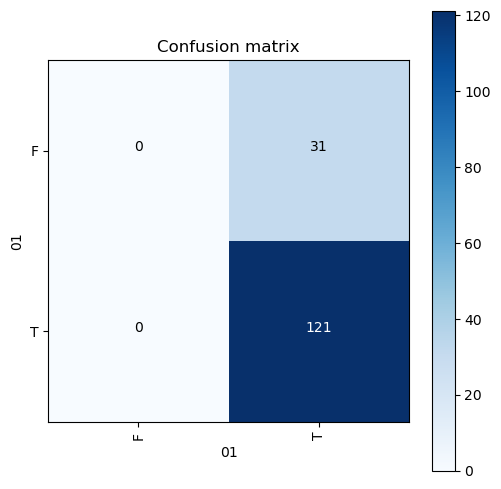

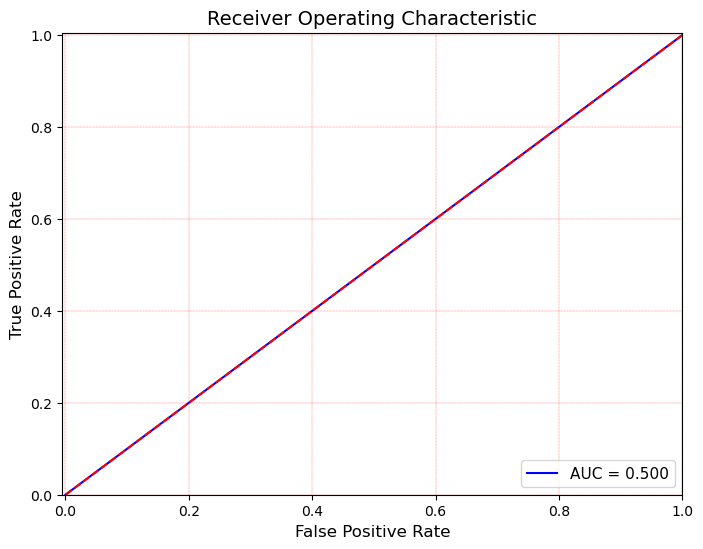

In [ ]:
from sklearn.linear_model import LogisticRegression

my_LogisticRegression(X_train, y_train, X_test, y_test, X, y)

### **<font color=lightgreen>- Decision Tree (ICA):</font>** ###


--------------------------------------------------------
||====================================================||
|| Train Accuracy Decision Tree Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 76.32%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 8.18  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 73.95% +- 2.57%  ||
||==========================================

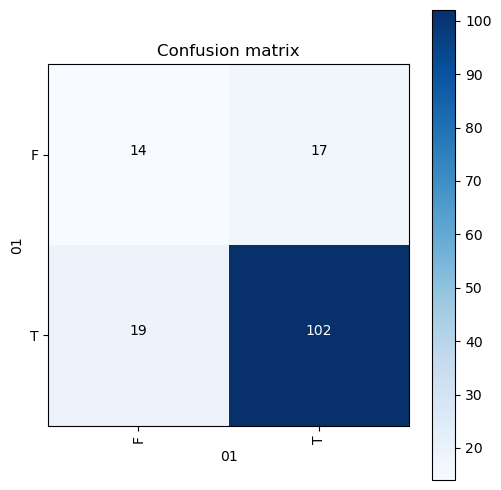

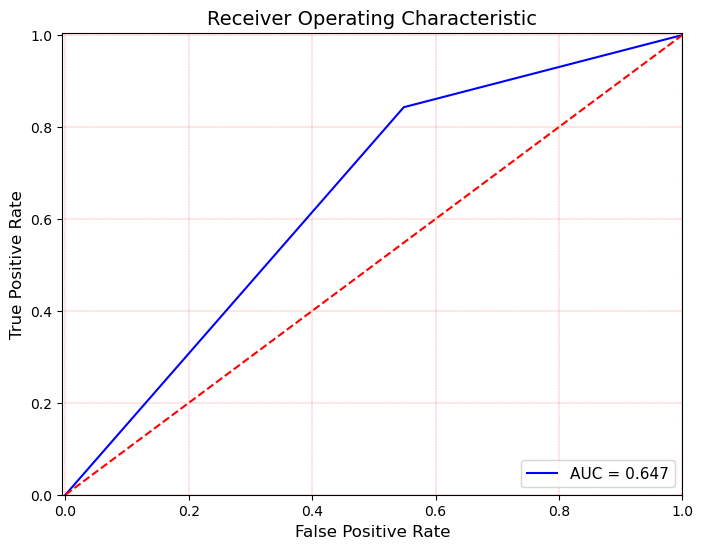

In [ ]:
my_Tree(X_train, y_train, X_test, y_test, X, y)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.80      1.00      0.89       121

    accuracy                           0.80       152
   macro avg       0.40      0.50      0.44       152
weighted avg       0.63      0.80      0.71       152

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:30000 - Early Stop:True - Hidden Layer Size:300]:=> 73.34 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||===

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\metr

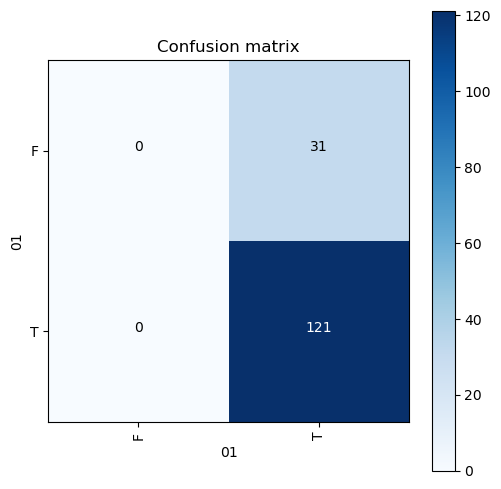

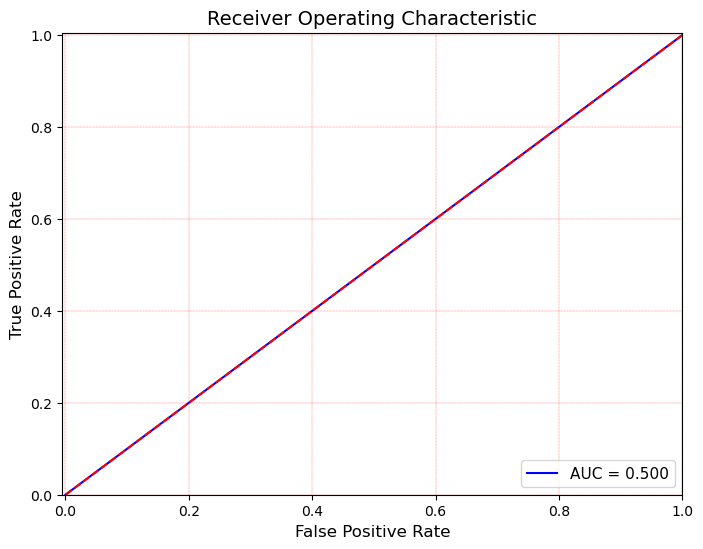

In [ ]:
my_MLP(X_train, y_train, X_test, y_test, X, y)

## **<font color=deepskyblue>- Sequential Backward Feature Elimination:</font>** ##


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.datasets import load_iris

# iris = load_iris()
# X = iris.data
# y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 616.6 kB/s eta 0:00:00



Sequential Forward Selection (k=3):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49)
CV Score:
0.8658940397350994


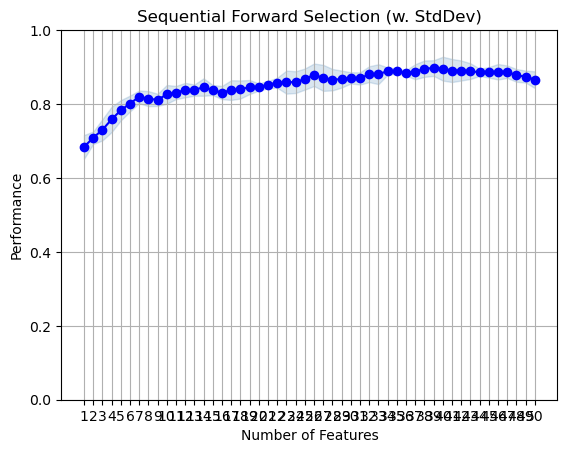

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs



# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=X_train.shape[1], 
          forward=True, 
          floating=False, 
          scoring='accuracy',
        #   verbose=5,
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

# print(sfs.k_feature_names_)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


Sequential Backward Floating Selection (k=3):
(38,)
CV Score:
0.6837748344370861


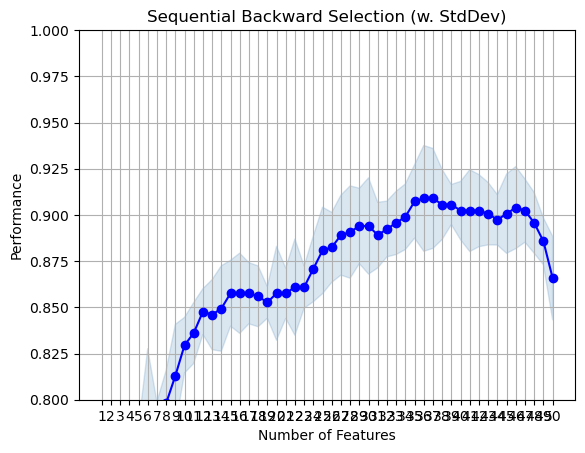

In [ ]:
# Sequential Backward Floating Selection
sbfs = SFS(knn, 
           k_features=1, 
           forward=False, 
           floating=False, #True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X_train, y_train)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)

fig1 = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

## **<font color=deepskyblue>- Autoencoder:</font>** ##


In [ ]:
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
# number of input columns
n_inputs = X.shape[1]
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=333, batch_size=32, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.grid()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

ModuleNotFoundError: No module named 'tensorflow'

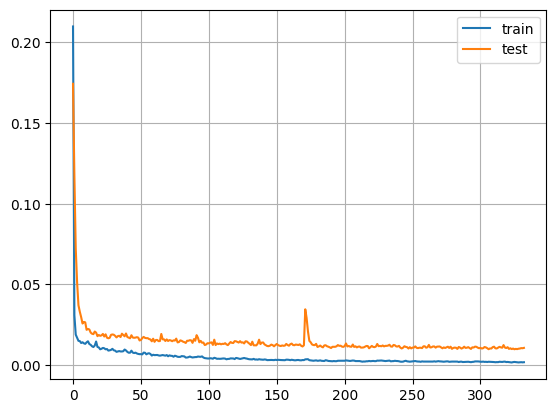

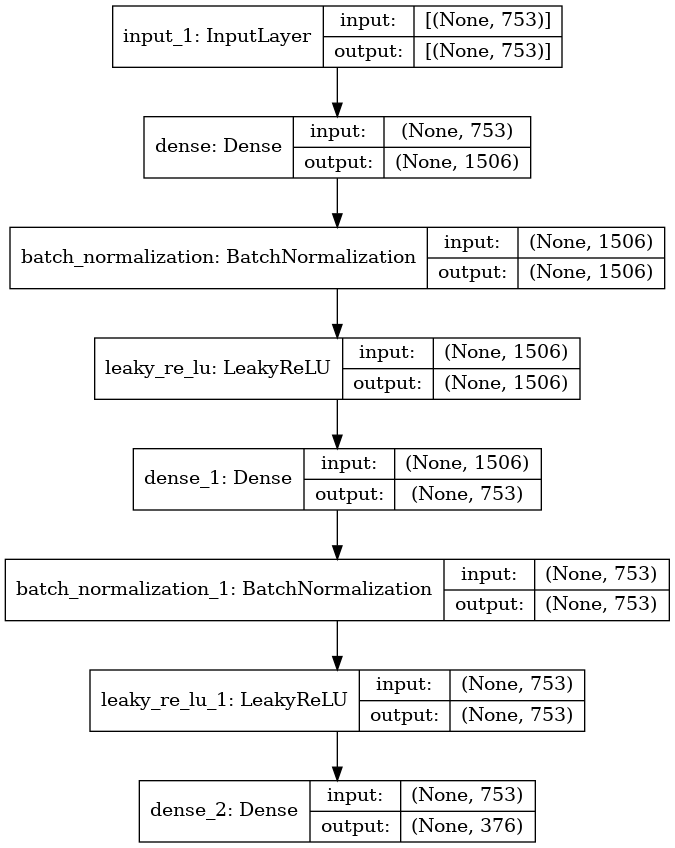

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.grid()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
# encoder.save('encoder.h5')

### **<font color=deepskyblue>- Logistic Regression - Autoencoder:</font>** ###


--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 88.16%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 4.09  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 76.85% +- 1.78%  ||
||===========================

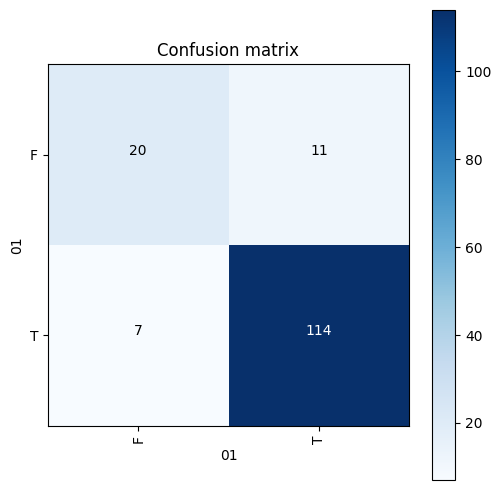

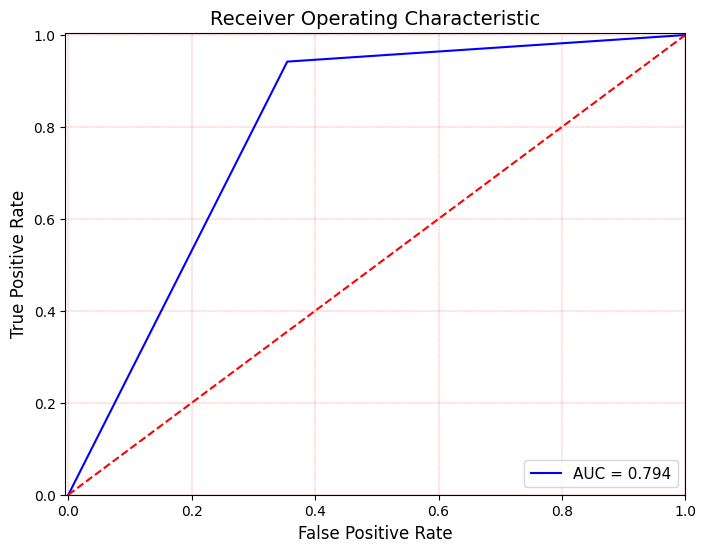

In [ ]:
# evaluate logistic regression on encoded input
from tensorflow.keras.models import load_model
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# load the model from file
encoder = load_model('encoder.h5', compile=False)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
X_train = X_train_encode
X_test = X_test_encode
# define the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
# fitting the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

### **<font color=deepskyblue>- KNN - Autoencoder:</font>** ###


--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 92.95%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 2.43  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 68.78% +- 2.96%  ||
||====================================================||
-----------------

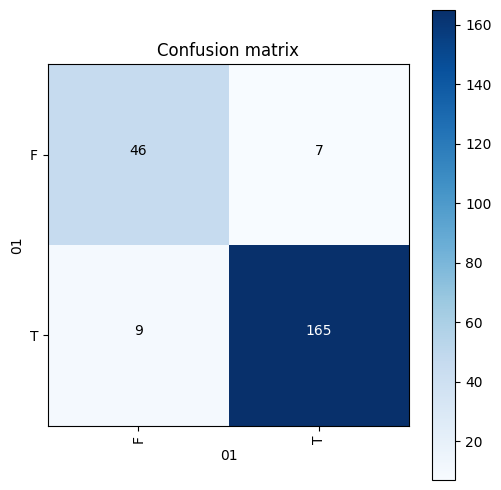

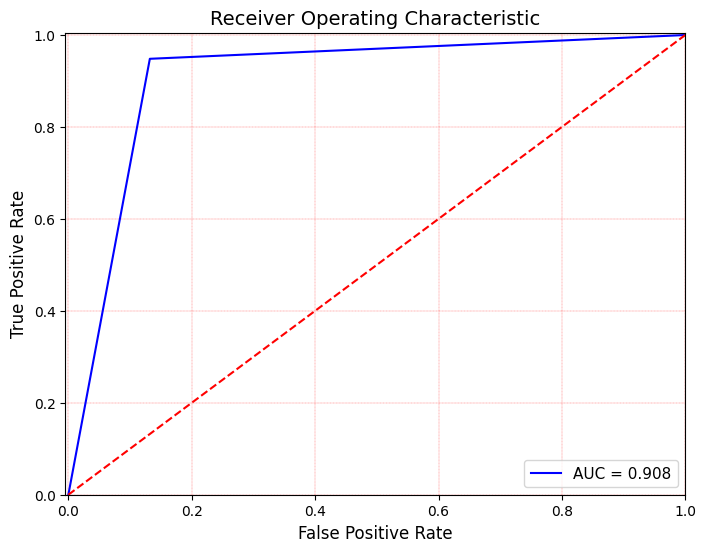

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5', compile=False)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
X_train = X_train_encode
X_test = X_test_encode

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.74      0.81        53
           1       0.92      0.98      0.95       174

    accuracy                           0.92       227
   macro avg       0.92      0.86      0.88       227
weighted avg       0.92      0.92      0.92       227

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:30000 - Early Stop:True - Hidden Layer Size:300]:=> 98.87 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||===

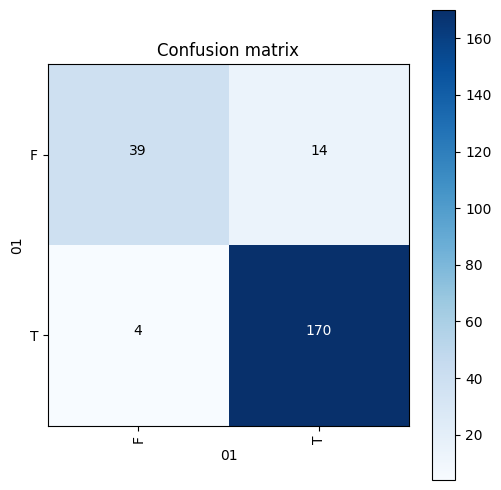

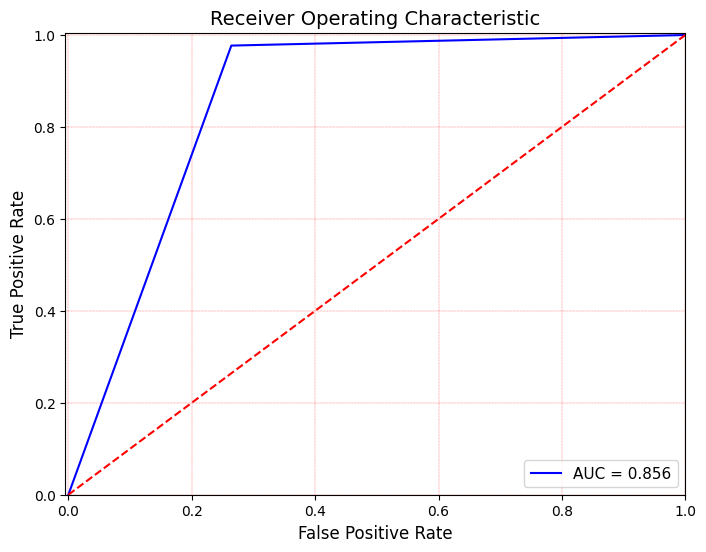

In [ ]:
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5', compile=False)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
X_train = X_train_encode
X_test = X_test_encode

hidden_layer_size=300
max_iteration=30000
activation_function='relu'
optimizer='adam'
early_stopping = True
###################################
mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 30), max_iter=max_iteration, 
                         activation=activation_function, solver=optimizer, 
                         learning_rate='adaptive', early_stopping=early_stopping)
mlp_adam.fit(X_train, y_train)

y_pred = mlp_adam.predict(X_test)

print("======================================================")
print(classification_report(y_test, y_pred))
print("======================================================")

y_pred_train = mlp_adam.predict(X_train)
print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_train, y_pred_train)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

print("-------------------------------------------------------------------------------------------------------------")
print("||=========================================================================================================||")
print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                            activation_function, 
                                                                            max_iteration,
                                                                            early_stopping,
                                                                            hidden_layer_size,
                                                                            accuracy_score(y_test, y_pred)*100
                                                                            )
, "||")
print("||=========================================================================================================||")
print("-------------------------------------------------------------------------------------------------------------")

print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - MLP Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

# acc = cross_val_score(mlp_adam, X, y, cv=5, scoring='accuracy')
# print("--------------------------------------------------------")
# print("||====================================================||")
# print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
# print("||====================================================||")
# print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")



# method I: plt
plot_roc_curve(y_test, y_pred)

--------------------------------------------------------
||====================================================||
|| Train Accuracy Decision Tree Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 71.81%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 9.74  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 76.20% +- 3.60%  ||
||==========================================

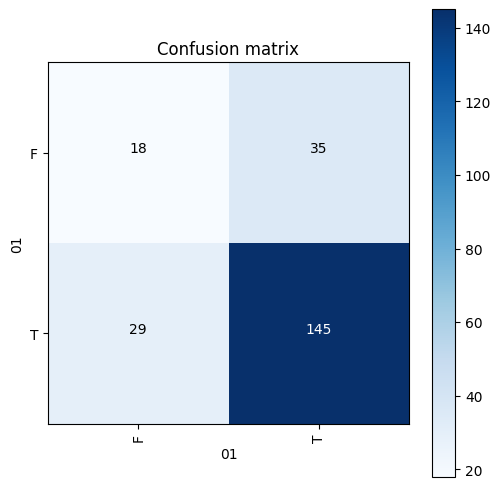

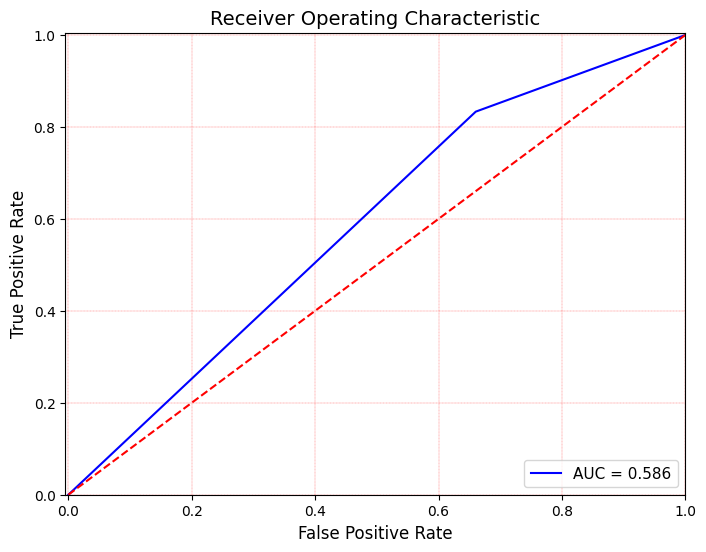

In [ ]:
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5', compile=False)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
X_train = X_train_encode
X_test = X_test_encode
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight='balanced', presort='deprecated', ccp_alpha=0.0, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Train Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Binary Cross Entropy - Decision Tree Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict((X_test))
print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 82.4%


# **<font color=deepskyblue>Ensemble methods:</font>** #

In [ ]:
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=10, random_state=0).fit(X_train, y_train)


In [ ]:
y_pred = clf.predict(X_test)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Accuracy SVM Model - Using <<Bagging>>:=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

--------------------------------------------------------
||====================================================||
|| Accuracy SVM Model - Using <<Bagging>>:=> 89.47%  ||
||====================================================||
--------------------------------------------------------


## **<font color=deepskyblue>Bagging methods:</font>** ##

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.transform(X)

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=1.0, max_features=1.0).fit(X_train, y_train)

---------------------------------------------------------------
||===========================================================||
|| Test Accuracy KNN Model - Using <<Bagging>>:=> 89.47%  ||
||===========================================================||
|| Train Accuracy KNN Model - Using <<Bagging>>:=> 93.54%  ||
||===========================================================||
|| Cross Entropy Accuracy: 83.86 (+/- 0.05) [Bagging]  ||
||===========================================================||
---------------------------------------------------------------
              precision    recall  f1-score   support

           F       0.83      0.61      0.70        31
           T       0.91      0.97      0.94       121

    accuracy                           0.89       152
   macro avg       0.87      0.79      0.82       152
weighted avg       0.89      0.89      0.89       152



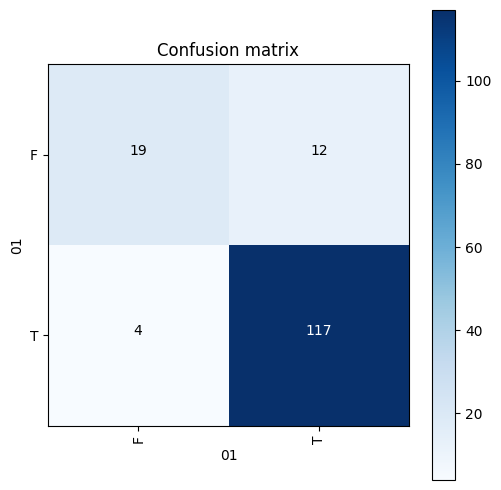

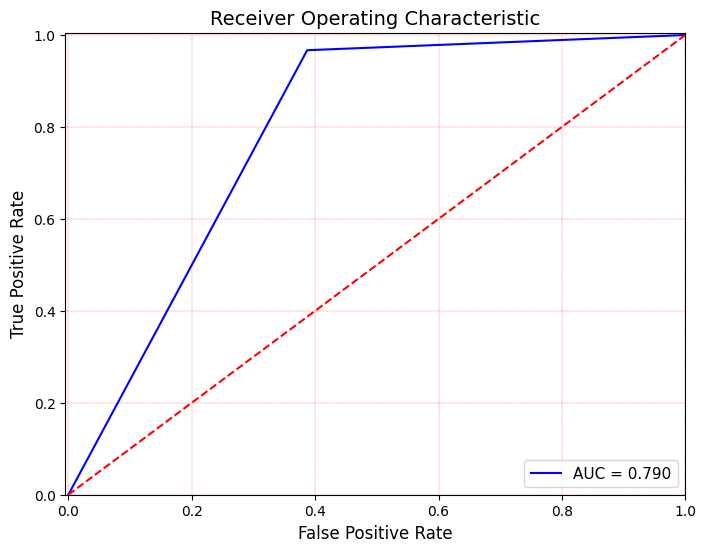

In [ ]:
y_pred = bagging.predict(X_test)
y_pred_train = bagging.predict(X_train)
print("---------------------------------------------------------------")
print("||===========================================================||")
print("|| Test Accuracy KNN Model - Using <<Bagging>>:=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
print("||===========================================================||")
print("|| Train Accuracy KNN Model - Using <<Bagging>>:=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
print("||===========================================================||")
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print("|| Cross Entropy Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), "Bagging"), " ||")
print("||===========================================================||")
print("---------------------------------------------------------------")
confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)

## **<font color=deepskyblue>AdaBoost methods:</font>** ##

--------------------------------------------------------
||====================================================||
|| Test Accuracy [Gradient Boosting] Model :=> 91.45%  ||
||====================================================||
|| Train Accuracy [Gradient Boosting] Model :=> 99.67%  ||
||====================================================||
--------------------------------------------------------
|| Cross Entropy Accuracy: 83.86 (+/- 0.05) [Gradient Boosting]  ||
||====================================================||
              precision    recall  f1-score   support

           F       0.80      0.77      0.79        31
           T       0.94      0.95      0.95       121

    accuracy                           0.91       152
   macro avg       0.87      0.86      0.87       152
weighted avg       0.91      0.91      0.91       152



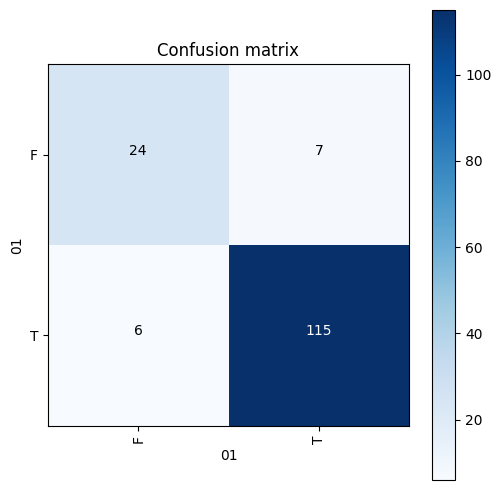

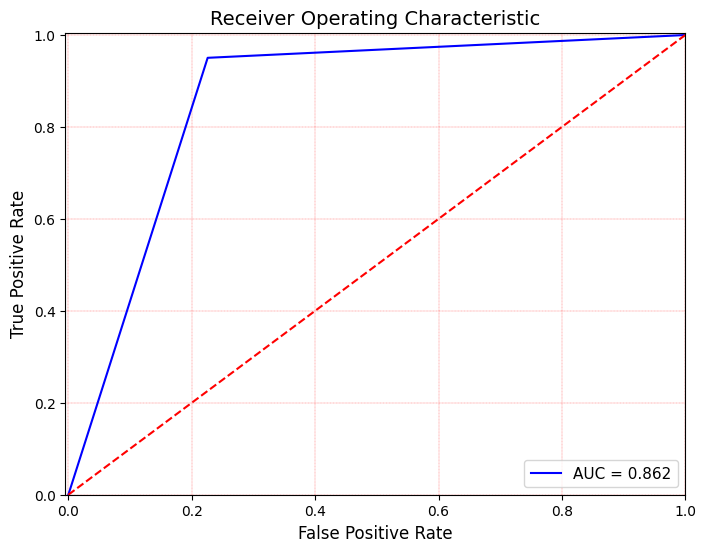

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.transform(X)
clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy [%s] Model :=> %.2f%%" % ("Gradient Boosting", accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("|| Train Accuracy [%s] Model :=> %.2f%%" % ("Gradient Boosting", accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print("|| Cross Entropy Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), "Gradient Boosting"), " ||")
print("||====================================================||")
confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)


## **<font color=deepskyblue>Majority Class Labels (Majority/Hard Voting):</font>** ##

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.transform(X)

clf1 = LogisticRegression(random_state=8, max_iter=1000)
clf2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.3)
clf3 = KNeighborsClassifier(n_neighbors=1)

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'GradientBoosting', 'KNN', 'Ensemble']):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy [%s] Model :=> %.2f%%" % (label, accuracy_score(y_test, y_pred)*100), " ||")
    print("|| Train Accuracy [%s] Model :=> %.2f%%" % (label, accuracy_score(y_train, y_pred_train)*100), " ||")
    # scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
    # print("|| Cross Entropy Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), label), " ||")
    print("||====================================================||")
print("--------------------------------------------------------")



--------------------------------------------------------
||====================================================||
|| Test Accuracy [Logistic Regression] Model :=> 90.13%  ||
|| Train Accuracy [Logistic Regression] Model :=> 93.54%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy [GradientBoosting] Model :=> 91.45%  ||
|| Train Accuracy [GradientBoosting] Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy [KNN] Model :=> 95.39%  ||
|| Train Accuracy [KNN] Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy [Ensemble] Model :=> 92.11%  

              precision    recall  f1-score   support

           F       0.88      0.71      0.79        31
           T       0.93      0.98      0.95       121

    accuracy                           0.92       152
   macro avg       0.90      0.84      0.87       152
weighted avg       0.92      0.92      0.92       152



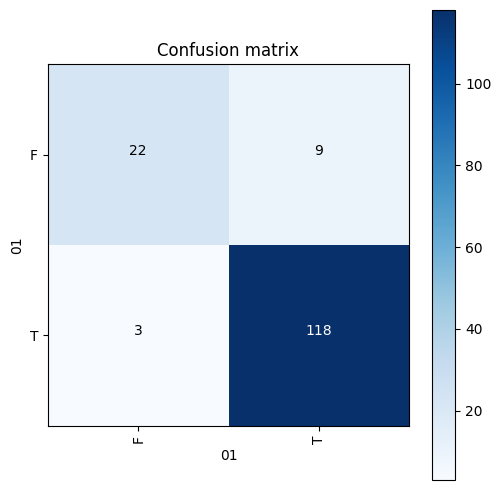

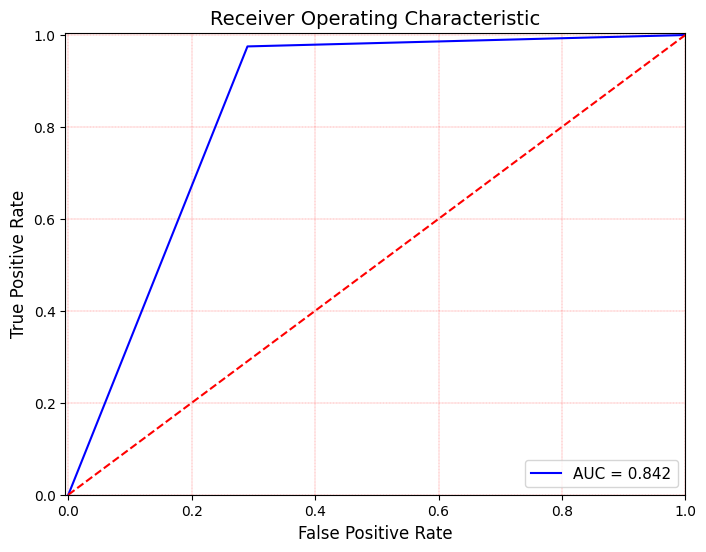

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)


## **<font color=deepskyblue>Gradient Boosting Classifier:</font>** ##

--------------------------------------------------------
||====================================================||
|| Test Accuracy [Gradient Boosting] Model :=> 92.11%  ||
||====================================================||
|| Train Accuracy [Gradient Boosting] Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
              precision    recall  f1-score   support

           F       0.88      0.71      0.79        31
           T       0.93      0.98      0.95       121

    accuracy                           0.92       152
   macro avg       0.90      0.84      0.87       152
weighted avg       0.92      0.92      0.92       152



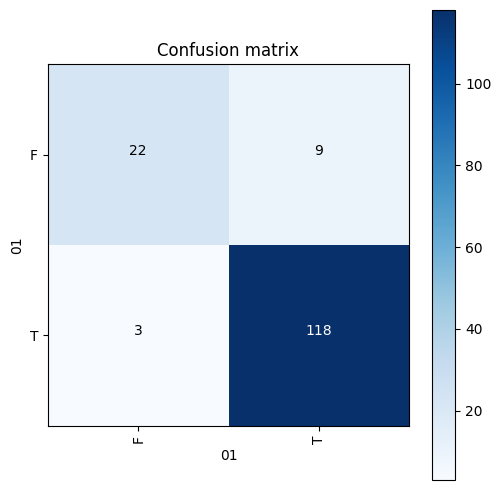

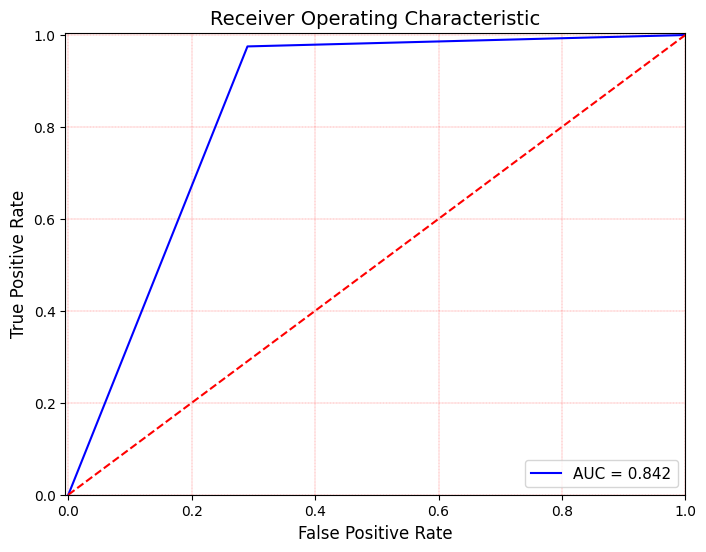

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.transform(X)

clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.3).fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy [%s] Model :=> %.2f%%" % ("Gradient Boosting", accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("|| Train Accuracy [%s] Model :=> %.2f%%" % ("Gradient Boosting", accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

confusion_mtx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names="FT"))
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)


## **<font color=deepskyblue>Hist Gradient Boosting Classifier:</font>** ##

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.transform(X)

clf = HistGradientBoostingClassifier(min_samples_leaf=1, learning_rate=0.3).fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy [%s] Model :=> %.2f%%" % ("HistGradientBoosting", accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("|| Train Accuracy [%s] Model :=> %.2f%%" % ("HistGradientBoosting", accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")

--------------------------------------------------------
||====================================================||
|| Test Accuracy [HistGradientBoosting] Model :=> 91.45%  ||
||====================================================||
|| Train Accuracy [HistGradientBoosting] Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------



## **<font color=deepskyblue>Weighted Average Probabilities (Soft Voting):</font>** ##

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X = min_max_scaler.transform(X)

# Training classifiers
clf1 = LogisticRegression(max_iter=1000)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = SVC(kernel='poly', probability=True, degree=5)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                         voting='soft', weights=[2, 3, 2])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

In [ ]:
y_pred = eclf.predict(X_test)
y_pred_train = eclf.predict(X_train)
print("--------------------------------------------------------")
print("||====================================================||")
print("|| Test Accuracy [%s] Model :=> %.2f%%" % ("Gradient Boosting", accuracy_score(y_test, y_pred)*100), " ||")
print("||====================================================||")
print("|| Train Accuracy [%s] Model :=> %.2f%%" % ("Gradient Boosting", accuracy_score(y_train, y_pred_train)*100), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
scores = cross_val_score(eclf, X, y, scoring='accuracy', cv=10)
print("|| Cross Entropy Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), label), " ||")
print("||====================================================||")
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred, target_names="FT"))

--------------------------------------------------------
||====================================================||
|| Test Accuracy [Gradient Boosting] Model :=> 94.74%  ||
||====================================================||
|| Train Accuracy [Gradient Boosting] Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
|| Cross Entropy Accuracy: 82.54 (+/- 0.04) [Ensemble]  ||
||====================================================||
--------------------------------------------------------
              precision    recall  f1-score   support

           F       0.87      0.87      0.87        31
           T       0.97      0.97      0.97       121

    accuracy                           0.95       152
   macro avg       0.92      0.92      0.92       152
weighted avg       0.95      0.95      0.95       152



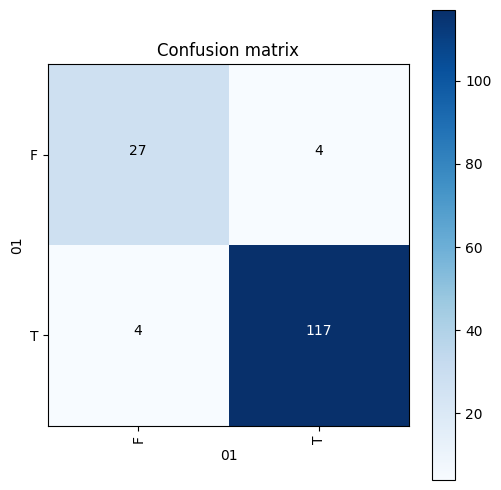

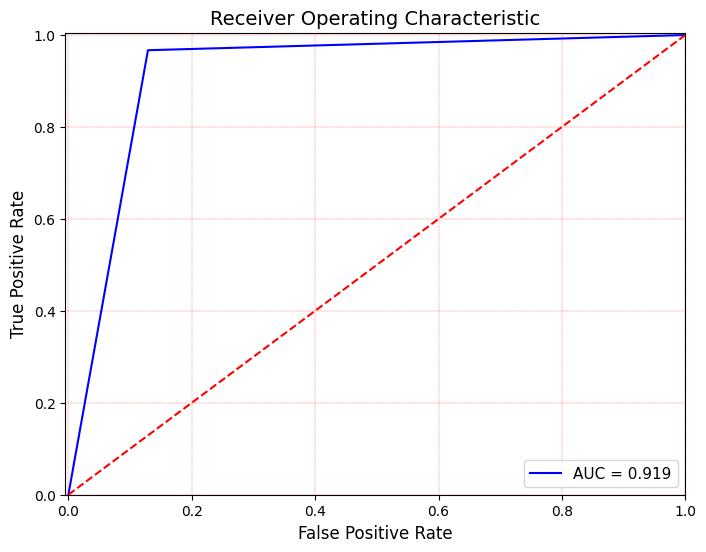

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, "FT")
# method I: plt
plot_roc_curve(y_test, y_pred)